In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings

# 경고 메시지 무시 설정
warnings.filterwarnings("ignore")

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (35.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and direc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

In [ ]:
data = pd.read_csv('./drive/MyDrive/data/서울시 휴게음식점 인허가 정보.csv', encoding='cp949')

In [ ]:
data.head()

,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y)
0,3030000,3030000-104-2023-00059,2023-04-25,33,133-848,서울특별시 성동구 용답동 73-2,"서울특별시 성동구 천호대로 292, 1층 (용답동)",4804.0,?커피,2023-04-25 12:49,I,07:00.0,커피숍,204609.2990,451552.7243
1,3130000,3130000-104-2022-00101,20220422,89.25,121849,서울특별시 마포구 성산동 515 월드컵주경기장,"서울특별시 마포구 월드컵로 240, 홈플러스 월드컵점 2층 x9.5,yuw호 (성산동)",3932.0,팜스365,2022-04-22 11:43,I,04:00.0,커피숍,191010.3810,451972.1540
2,3000000,3000000-104-2022-00056,2022-04-22,85.95,110-863,서울특별시 종로구 숭인동 169 1층,"서울특별시 종로구 종로 377, 1층 (숭인동)",3112.0,메가엠지씨커피 종로숭인점,2024-01-09 15:25,U,01:00.0,기타 휴게음식점,201646.2188,452451.5627
3,3200000,3200000-104-2023-00188,2023-10-30,33,151-895,서울특별시 관악구 신림동 1538-14,"서울특별시 관악구 대학길 46, 1층 (신림동)",8813.0,김호두(신림점),2023-12-18 17:26,U,00:00.0,커피숍,194406.9111,440725.5995
4,3000000,3000000-104-2023-00015,2023-02-16,95.08,110-360,서울특별시 종로구 와룡동 109-1 UD빌딩 1층,"서울특별시 종로구 돈화문로 88-1, UD빌딩 1층 (와룡동)",3134.0,노우즈 창덕,2023-02-16 10:25,I,08:00.0,커피숍,199100.9710,452677.9831


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38259 entries, 0 to 38258
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   개방자치단체코드  38259 non-null  int64  
 1   관리번호      38259 non-null  object 
 2   인허가일자     38259 non-null  object 
 3   소재지면적     37190 non-null  object 
 4   소재지우편번호   38208 non-null  object 
 5   지번주소      38208 non-null  object 
 6   도로명주소     37648 non-null  object 
 7   도로명우편번호   37431 non-null  float64
 8   사업장명      38259 non-null  object 
 9   최종수정일자    38259 non-null  object 
 10  데이터갱신구분   38259 non-null  object 
 11  데이터갱신일자   38259 non-null  object 
 12  업태구분명     38259 non-null  object 
 13  좌표정보(X)   37533 non-null  float64
 14  좌표정보(Y)   37533 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 4.4+ MB


In [ ]:
df = data.copy()

# 불필요한 칼럼 삭제

In [ ]:
df.drop(['최종수정일자', '데이터갱신구분', '데이터갱신일자'], axis=1, inplace=True)

In [ ]:
df.head()

,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y)
0,3030000,3030000-104-2023-00059,2023-04-25,33,133-848,서울특별시 성동구 용답동 73-2,"서울특별시 성동구 천호대로 292, 1층 (용답동)",4804.0,?커피,커피숍,204609.2990,451552.7243
1,3130000,3130000-104-2022-00101,20220422,89.25,121849,서울특별시 마포구 성산동 515 월드컵주경기장,"서울특별시 마포구 월드컵로 240, 홈플러스 월드컵점 2층 x9.5,yuw호 (성산동)",3932.0,팜스365,커피숍,191010.3810,451972.1540
2,3000000,3000000-104-2022-00056,2022-04-22,85.95,110-863,서울특별시 종로구 숭인동 169 1층,"서울특별시 종로구 종로 377, 1층 (숭인동)",3112.0,메가엠지씨커피 종로숭인점,기타 휴게음식점,201646.2188,452451.5627
3,3200000,3200000-104-2023-00188,2023-10-30,33,151-895,서울특별시 관악구 신림동 1538-14,"서울특별시 관악구 대학길 46, 1층 (신림동)",8813.0,김호두(신림점),커피숍,194406.9111,440725.5995
4,3000000,3000000-104-2023-00015,2023-02-16,95.08,110-360,서울특별시 종로구 와룡동 109-1 UD빌딩 1층,"서울특별시 종로구 돈화문로 88-1, UD빌딩 1층 (와룡동)",3134.0,노우즈 창덕,커피숍,199100.9710,452677.9831


# 위경도 변환

In [ ]:
pip install pyproj

In [ ]:
from pyproj import Proj, transform

In [ ]:
ㅁ

In [ ]:
# 입력 좌표계와 출력 좌표계 정의
input_projection = Proj(init='epsg:2097')  # 중부원점TM
output_projection = Proj(init='epsg:4326')  # 위경도 좌표계 (WGS 84)

# X, Y 좌표를 위경도로 변환
longitude, latitude = transform(input_projection, output_projection, df['좌표정보(X)'].values, df['좌표정보(Y)'].values)

# 변환된 위경도를 데이터프레임에 추가
df['경도'] = longitude
df['위도'] = latitude

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-42-6afd55934c2b>:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  longitude, latitude = transform(input_projection, o

In [ ]:
df

# oo구, oo동 추출

도로명 주소로 끝나는 주소가 남아있음..

In [ ]:
df[df['지번주소'].isna()]

,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y)
2026,3050000,3050000-104-2016-00034,2016-02-26,26.6,NaN,NaN,"서울특별시 동대문구 왕산로 214, 3층 (전농동)",2555.0,호밀호두,철도역구내,204081.2821,453187.3952
6055,3170000,3170000-104-2024-00006,2024-01-25,NaN,NaN,NaN,"서울특별시 금천구 범안로 1158, 1층 101호 (독산동, 태영아파트)",8601.0,CU 독산역점,편의점,190241.1765,440453.9156
7128,3120000,3120000-104-1999-04090,19991007,29,NaN,NaN,서울특별시 서대문구 거북골로 20 (홍은동),3675.0,봉구스밥버거,일반조리판매,193318.9837,453141.4453
7260,3130000,3130000-104-2017-00092,2017-03-16,262.73,NaN,NaN,"서울특별시 마포구 양화로 100 (서교동, 1층일부,2층일부)",4038.0,버거킹서교동사거리점,패스트푸드,192748.8141,450048.3780
8766,3240000,3240000-104-2015-00047,20150409,17.85,NaN,NaN,"서울특별시 강동구 천호대로170길 96, 102호 (성내동, 하늘채)",5390.0,셀람(SELAM),커피숍,211546.6943,447688.2451
10961,3100000,3100000-104-2016-00202,20161107,26.44,NaN,NaN,"서울특별시 노원구 공릉로 221, 1층 (공릉동)",1833.0,마온(maon),커피숍,206719.7393,458506.9527
13698,3010000,3010000-104-2014-00081,20140428,31.13,NaN,NaN,"서울특별시 중구 을지로 88 (을지로2가, 을지로지하도상가 을특4호)",NaN,카페408,커피숍,198719.0759,451547.4898
13731,3010000,3010000-104-2014-00020,20140226,24.99,NaN,NaN,"서울특별시 중구 을지로 지하 88 (을지로2가, 을지로지하도상가 을특1-2호)",4542.0,스위트부스,기타 휴게음식점,198719.0759,451547.4898
14197,3010000,3010000-104-2015-00028,20150205,19.43,NaN,NaN,"서울특별시 중구 을지로 지하 58 (을지로2가, 을지입구쇼핑센타 33,34,36호)",4539.0,제퍼커피 을지로입구역점,커피숍,198487.1522,451529.2562
14469,3010000,3010000-104-2013-00076,20130531,9.57,NaN,NaN,"서울특별시 중구 을지로 지하 12 (을지로1가, 시청광장 지하상가 100호)",4533.0,일리하우스,커피숍,198070.5831,451548.3831


In [ ]:
df.loc[df['지번주소'].isna(), '지번주소'] = df.loc[df['지번주소'].isna(), '도로명주소']

In [ ]:
df[df['지번주소'].isna()]

,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y)


In [ ]:
df['구'] = df['지번주소'].apply(lambda x: x.split()[1])
df['동'] = df['지번주소'].apply(lambda x: x.split()[2])

In [ ]:
df

,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y),구,동
0,3030000,3030000-104-2023-00059,2023-04-25,33,133-848,서울특별시 성동구 용답동 73-2,"서울특별시 성동구 천호대로 292, 1층 (용답동)",4804.0,?커피,커피숍,204609.2990,451552.7243,성동구,용답동
1,3130000,3130000-104-2022-00101,20220422,89.25,121849,서울특별시 마포구 성산동 515 월드컵주경기장,"서울특별시 마포구 월드컵로 240, 홈플러스 월드컵점 2층 x9.5,yuw호 (성산동)",3932.0,팜스365,커피숍,191010.3810,451972.1540,마포구,성산동
2,3000000,3000000-104-2022-00056,2022-04-22,85.95,110-863,서울특별시 종로구 숭인동 169 1층,"서울특별시 종로구 종로 377, 1층 (숭인동)",3112.0,메가엠지씨커피 종로숭인점,기타 휴게음식점,201646.2188,452451.5627,종로구,숭인동
3,3200000,3200000-104-2023-00188,2023-10-30,33,151-895,서울특별시 관악구 신림동 1538-14,"서울특별시 관악구 대학길 46, 1층 (신림동)",8813.0,김호두(신림점),커피숍,194406.9111,440725.5995,관악구,신림동
4,3000000,3000000-104-2023-00015,2023-02-16,95.08,110-360,서울특별시 종로구 와룡동 109-1 UD빌딩 1층,"서울특별시 종로구 돈화문로 88-1, UD빌딩 1층 (와룡동)",3134.0,노우즈 창덕,커피숍,199100.9710,452677.9831,종로구,와룡동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38254,3010000,3010000-104-2010-00196,20101116,47.62,100841,서울특별시 중구 신당동 369-47 (1층),"서울특별시 중구 다산로 118 (신당동,(1층))",4597.0,배스킨라빈스 약수역점,기타 휴게음식점,200869.6034,450219.9997,중구,신당동
38255,3150000,3150000-104-2022-00300,2022-12-19,66,157-840,서울특별시 강서구 등촌동 644-12 성명빌딩,"서울특별시 강서구 공항대로55길 33, 성명빌딩 1층 (등촌동)",7570.0,어니스트[:EARNEST],커피숍,187670.7003,450273.9989,강서구,등촌동
38256,3220000,3220000-104-2021-00587,2021-10-20,19.6,135-513,서울특별시 강남구 역삼동 702-13 성지하이츠1,"서울특별시 강남구 테헤란로 313, 성지하이츠1 지하1층 6호 (역삼동)",6151.0,청담커피 앤 토스트,커피숍,203931.0981,444622.8493,강남구,역삼동
38257,3230000,3230000-104-2018-00474,20181115,48.51,138837,서울특별시 송파구 삼전동 6-11,"서울특별시 송파구 삼전로8길 5, 1층 (삼전동)",5606.0,행복상점,기타 휴게음식점,207865.7512,444792.1906,송파구,삼전동


In [ ]:
df[df['동'].str.endswith('로')]

,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y),구,동
1922,3000000,3000000-104-2023-00097,2023-07-19,9,110-821,서울특별시 종로구 세종로 81-3,서울특별시 종로구 세종대로 175 (세종로),3172.0,온누리농특산,푸드트럭,197804.3578,452216.5393,종로구,세종로
2026,3050000,3050000-104-2016-00034,2016-02-26,26.6,NaN,"서울특별시 동대문구 왕산로 214, 3층 (전농동)","서울특별시 동대문구 왕산로 214, 3층 (전농동)",2555.0,호밀호두,철도역구내,204081.2821,453187.3952,동대문구,왕산로
2312,3000000,3000000-104-2002-00015,2002-02-26,342.4,110-822,서울특별시 종로구 세종로 185-2,서울특별시 종로구 세종대로 167 (세종로),3183.0,스타벅스 광화문점,다방,197837.6676,452107.2874,종로구,세종로
2530,3000000,3000000-104-2023-00092,2023-07-18,9,110-821,서울특별시 종로구 세종로 81-3,"서울특별시 종로구 세종대로 175, 광화문 광장 (세종로)",3172.0,악어푸드 로드?,푸드트럭,197804.3578,452216.5393,종로구,세종로
4250,3000000,3000000-104-2005-00054,20050812,NaN,110820,서울특별시 종로구 세종로 1-57번지 1층,NaN,NaN,아름다운고궁,커피숍,197866.0846,452747.6188,종로구,세종로
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29089,3180000,3180000-104-2016-00268,20160719,9,NaN,"서울특별시 영등포구 여의동로 343 (여의도동, 여의도한강공원 이벤트광장(96구86...","서울특별시 영등포구 여의동로 343 (여의도동, 여의도한강공원 이벤트광장(96구86...",NaN,더티댄싱,푸드트럭,192875.2293,447481.6991,영등포구,여의동로
29109,3180000,3180000-104-2016-00246,20160719,9,NaN,"서울특별시 영등포구 여의동로 343 (여의도동, 여의도한강공원 이벤트광장(90어55...","서울특별시 영등포구 여의동로 343 (여의도동, 여의도한강공원 이벤트광장(90어55...",NaN,휴하우스,푸드트럭,192875.2293,447481.6991,영등포구,여의동로
34857,3130000,3130000-104-2016-00424,2016-12-26,9.9,NaN,"서울특별시 마포구 백범로 68 (신수동, 1층일부)","서울특별시 마포구 백범로 68 (신수동, 1층일부)",4110.0,계순네 닭강정,기타 휴게음식점,194549.9230,449633.7936,마포구,백범로
35423,3220000,3220000-104-2017-00601,20170828,30.5,NaN,"서울특별시 강남구 밤고개로 99, 지하2층 SB21호 (수서동, 수서역사)","서울특별시 강남구 밤고개로 99, 지하2층 SB21호 (수서동, 수서역사)",6369.0,파머스박스수서역사점,패스트푸드,209141.0000,442587.0000,강남구,밤고개로


# 인허가일자 전처리

In [ ]:
df['인허가일자'] = pd.to_datetime(df['인허가일자'], errors='coerce').dt.strftime('%Y-%m-%d')

In [ ]:
df[['인허가연도', '인허가월', '인허가일']] = df['인허가일자'].str.split('-', expand=True)

In [ ]:
df

,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y),구,동,인허가연도,인허가월,인허가일
0,3030000,3030000-104-2023-00059,2023-04-25,33,133-848,서울특별시 성동구 용답동 73-2,"서울특별시 성동구 천호대로 292, 1층 (용답동)",4804.0,?커피,커피숍,204609.2990,451552.7243,성동구,용답동,2023,04,25
1,3130000,3130000-104-2022-00101,2022-04-22,89.25,121849,서울특별시 마포구 성산동 515 월드컵주경기장,"서울특별시 마포구 월드컵로 240, 홈플러스 월드컵점 2층 x9.5,yuw호 (성산동)",3932.0,팜스365,커피숍,191010.3810,451972.1540,마포구,성산동,2022,04,22
2,3000000,3000000-104-2022-00056,2022-04-22,85.95,110-863,서울특별시 종로구 숭인동 169 1층,"서울특별시 종로구 종로 377, 1층 (숭인동)",3112.0,메가엠지씨커피 종로숭인점,기타 휴게음식점,201646.2188,452451.5627,종로구,숭인동,2022,04,22
3,3200000,3200000-104-2023-00188,2023-10-30,33,151-895,서울특별시 관악구 신림동 1538-14,"서울특별시 관악구 대학길 46, 1층 (신림동)",8813.0,김호두(신림점),커피숍,194406.9111,440725.5995,관악구,신림동,2023,10,30
4,3000000,3000000-104-2023-00015,2023-02-16,95.08,110-360,서울특별시 종로구 와룡동 109-1 UD빌딩 1층,"서울특별시 종로구 돈화문로 88-1, UD빌딩 1층 (와룡동)",3134.0,노우즈 창덕,커피숍,199100.9710,452677.9831,종로구,와룡동,2023,02,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38254,3010000,3010000-104-2010-00196,2010-11-16,47.62,100841,서울특별시 중구 신당동 369-47 (1층),"서울특별시 중구 다산로 118 (신당동,(1층))",4597.0,배스킨라빈스 약수역점,기타 휴게음식점,200869.6034,450219.9997,중구,신당동,2010,11,16
38255,3150000,3150000-104-2022-00300,2022-12-19,66,157-840,서울특별시 강서구 등촌동 644-12 성명빌딩,"서울특별시 강서구 공항대로55길 33, 성명빌딩 1층 (등촌동)",7570.0,어니스트[:EARNEST],커피숍,187670.7003,450273.9989,강서구,등촌동,2022,12,19
38256,3220000,3220000-104-2021-00587,2021-10-20,19.6,135-513,서울특별시 강남구 역삼동 702-13 성지하이츠1,"서울특별시 강남구 테헤란로 313, 성지하이츠1 지하1층 6호 (역삼동)",6151.0,청담커피 앤 토스트,커피숍,203931.0981,444622.8493,강남구,역삼동,2021,10,20
38257,3230000,3230000-104-2018-00474,2018-11-15,48.51,138837,서울특별시 송파구 삼전동 6-11,"서울특별시 송파구 삼전로8길 5, 1층 (삼전동)",5606.0,행복상점,기타 휴게음식점,207865.7512,444792.1906,송파구,삼전동,2018,11,15


# 스타벅스 데이터

In [ ]:
starbucks = df[df['사업장명'].str.contains('스타벅스', na=False)]

In [ ]:
starbucks

,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y),구,동,인허가연도,인허가월,인허가일,경도,위도
32,3130000,3130000-104-2023-00078,2023-03-24,408.67,121-818,서울특별시 마포구 동교동 173-14,"서울특별시 마포구 양화로 192, 1,2층 (동교동)",4056.0,스타벅스 홍대동교점,커피숍,193414.6768,450675.0036,마포구,동교동,2023,03,24,126.923367,37.558326
67,3210000,3210000-104-2010-00139,2010-07-14,181.5,137-878,서울특별시 서초구 서초동 1623-1 1층,"서울특별시 서초구 서초중앙로 64, 대영빌딩 1층 (서초동)",6640.0,스타벅스 서울교대점,커피숍,201279.4432,442806.7092,서초구,서초동,2010,07,14,127.012365,37.487456
87,3210000,3210000-104-2022-00007,2022-01-06,137.8,137-040,서울특별시 서초구 반포동 20-45 1층 112호,"서울특별시 서초구 잠원로 24, 1층 112호 (반포동)",6544.0,스타벅스 반포자이점,커피숍,200800.4170,444989.8743,서초구,반포동,2022,01,06,127.006951,37.507127
90,3220000,3220000-104-2021-00029,2021-01-25,358.23,135-843,서울특별시 강남구 대치동 922-1 SH타워,"서울특별시 강남구 선릉로 324, SH타워 지상1,2층 (대치동)",6205.0,스타벅스 대치한티점,커피숍,204537.4607,444036.1667,강남구,대치동,2021,01,25,127.049211,37.498523
93,3210000,3210000-104-2019-00297,2019-10-22,336.2,137-851,서울특별시 서초구 방배동 1022-5 감정평가사회관 1층,"서울특별시 서초구 방배로 52, 감정평가사회관 1층 (방배동)",6705.0,스타벅스 방배로점,커피숍,199885.0660,441910.0295,서초구,방배동,2019,10,22,126.996599,37.479378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9043,3130000,3130000-104-2007-00093,2007-09-14,99.08,121-815,"서울특별시 마포구 도화동 563 마포아크로타워 105,106,117,118,119호","서울특별시 마포구 마포대로 68 (도화동,마포아크로타워 105,106,117,118...",4168.0,스타벅스마포아크로점,커피숍,195422.1754,448787.9735,마포구,도화동,2007,09,14,126.946100,37.541336
9044,3220000,3220000-104-2004-00192,2004-08-23,142.14,135-818,서울특별시 강남구 논현동 87-0 지상1층,"서울특별시 강남구 논현로 704 (논현동,지상1층)",6052.0,스타벅스학동역점,다방,202646.5733,445825.6459,강남구,논현동,2004,08,23,127.027834,37.514654
15912,3160000,3160000-104-2023-00009,2023-01-12,396.69,152828,서울특별시 구로구 고척동 100-7 고척아이파크,"서울특별시 구로구 경인로43길 49, 1층 D-101호 (고척동, 고척아이파크)",8226.0,스타벅스 고척아이파크점,커피숍,187477.5794,444045.2949,구로구,고척동,2023,01,12,126.856287,37.498531
16164,3040000,3040000-104-2015-00052,2015-04-27,310.96,143819,서울특별시 광진구 구의동 67-7 1층~2층,"서울특별시 광진구 광나루로 519, 1~2층 (구의동)",4976.0,스타벅스커피구의디티(DT)점,커피숍,207644.6700,449227.7142,광진구,구의동,2015,04,27,127.084403,37.545279


# 이디야 데이터

In [ ]:
ediya = df[df['사업장명'].str.contains('이디야', na=False)]

In [ ]:
ediya

,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y),구,동,인허가연도,인허가월,인허가일,경도,위도
39,3070000,3070000-104-2023-00049,2023-03-24,52.9,136-818,서울특별시 성북구 석관동 246-10,"서울특별시 성북구 돌곶이로22길 3, 1층 (석관동)",2783.0,이디야 돌곶이역점,커피숍,205060.7314,456432.1845,성북구,석관동,2023,03,24,127.055213,37.610208
64,3230000,3230000-104-2016-00041,2016-02-24,132.98,138-881,서울특별시 송파구 가락동 600 가락동 농수산물도매시장,"서울특별시 송파구 양재대로 932, 가락동 농수산물도매시장 가락몰 3관 3층 1-1...",5699.0,이디야 가락몰점,기타 휴게음식점,209790.9599,443481.2122,송파구,가락동,2016,02,24,127.108614,37.493483
103,3160000,3160000-104-2018-00005,2018-01-15,101.12,152-826,서울특별시 구로구 고척동 76-160 골든타워빌딩 별관 지상1층 101호,"서울특별시 구로구 경인로 397, 골든타워빌딩 별관동 지상1층 101호 (고척동)",8227.0,이디야 고척스카이돔점,커피숍,187888.2722,443955.6145,구로구,고척동,2018,01,15,126.860933,37.497728
314,3000000,3000000-104-2013-00184,2013-12-20,22.51,110-320,서울특별시 종로구 낙원동 45-3,"서울특별시 종로구 삼일대로 436-1, 1층 (낙원동)",3133.0,이디야커피,커피숍,198872.9491,452367.0042,종로구,낙원동,2013,12,20,126.985140,37.573594
317,3040000,3040000-104-2020-00157,2020-09-02,112.2,143-819,서울특별시 광진구 구의동 78-8,"서울특별시 광진구 자양로 251, 1층 (구의동)",4992.0,이디야커피 구의자양로점,커피숍,207820.9416,449642.2877,광진구,구의동,2020,09,02,127.086402,37.549012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38023,3070000,3070000-104-2022-00090,2022-05-10,71.35,136071,서울특별시 성북구 안암동1가 190 1층,"서울특별시 성북구 보문로30가길 42, 1층 (안암동1가)",2850.0,이디야 안암래미안점,커피숍,201875.2897,454077.0291,성북구,안암동1가,2022,05,10,127.019130,37.589000
38089,3010000,3010000-104-2012-00076,2012-05-07,85.8,100-281,서울특별시 중구 인현동1가 101-1,"서울특별시 중구 마른내로 49 (인현동1가, 외 2필지 지상1,2층)",4549.0,이디야커피 을지로중앙점,커피숍,199375.4571,451359.0138,중구,인현동1가,2012,05,07,126.990829,37.564512
38160,3130000,3130000-104-2022-00326,2022-12-02,33,121807,서울특별시 마포구 노고산동 49-31 농협중앙회,"서울특별시 마포구 신촌로 66, 농협중앙회 1층 (노고산동)",4057.0,이디야 하나로마트 신촌점,커피숍,194020.0232,450426.5833,마포구,노고산동,2022,12,02,126.930221,37.556092
38181,3110000,3110000-104-2023-00004,2023-01-03,87.44,122896,서울특별시 은평구 역촌동 17-19,"서울특별시 은평구 진흥로 95, 1층 (역촌동)",3404.0,이디야(역촌역점),커피숍,193054.1673,455905.7864,은평구,역촌동,2023,01,03,126.919237,37.605452


# 메가커피

상호명이 메가커피인 것 중에 프랜차이즈 메가커피가 아닐 수도...?

In [ ]:
mega = df[df['사업장명'].str.contains('메가엠지씨|메가커피', na=False)]

In [ ]:
mega

,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y),구,동,인허가연도,인허가월,인허가일,경도,위도
2,3000000,3000000-104-2022-00056,2022-04-22,85.95,110-863,서울특별시 종로구 숭인동 169 1층,"서울특별시 종로구 종로 377, 1층 (숭인동)",3112.0,메가엠지씨커피 종로숭인점,기타 휴게음식점,201646.2188,452451.5627,종로구,숭인동,2022,04,22,127.016533,37.574355
34,3220000,3220000-104-2023-00133,2023-03-24,40,135-897,서울특별시 강남구 신사동 661-1,"서울특별시 강남구 압구정로 338, 지상1층 3호 (신사동)",6018.0,메가엠지씨커피 압구정로데오역점,커피숍,203368.9242,447298.4584,강남구,신사동,2023,03,24,127.036011,37.527921
54,3170000,3170000-104-2019-00046,2019-03-18,39.87,153-010,서울특별시 금천구 독산동 1147 금천롯데캐슬골드파크1차아파트,"서울특별시 금천구 벚꽃로 40, 113동 107호 (독산동, 금천롯데캐슬골드파크1차...",8608.0,메가엠지씨커피 금천롯데캐슬,커피숍,190592.7346,439737.2210,금천구,독산동,2019,03,18,126.891570,37.459752
184,3040000,3040000-104-2023-00046,2023-03-27,89.2,143-883,서울특별시 광진구 중곡동 18-74 경동빌딩 103호,"서울특별시 광진구 용마산로 114, 경동빌딩 1층 103호 (중곡동)",4941.0,메가엠지씨커피 중곡대원점,커피숍,207626.7596,451292.0421,광진구,중곡동,2023,03,27,127.084222,37.563878
188,3010000,3010000-104-2023-00054,2023-03-27,56,100-824,서울특별시 중구 신당동 291-29,"서울특별시 중구 다산로36길 36, 1층 1호 (신당동)",4586.0,메가엠지씨커피 청구신당점,커피숍,201422.0782,451064.5653,중구,신당동,2023,03,27,127.013993,37.561859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38172,3080000,3080000-104-2022-00131,2022-12-30,69.4,142808,서울특별시 강북구 미아동 126-4 지상1층 104호,"서울특별시 강북구 도봉로 174, 1층 104호 (미아동)",1158.0,메가엠지씨커피 미아중앙점,기타 휴게음식점,202337.6677,458007.7608,강북구,미아동,2022,12,30,127.024378,37.624414
38196,3030000,3030000-104-2022-00071,2022-05-13,48.33,133880,서울특별시 성동구 홍익동 125 동아맨션,"서울특별시 성동구 고산자로 293, 동아맨션 1층 105호 (홍익동)",4708.0,메가엠지씨커피 도선사거리점,커피숍,203114.7586,451504.7670,성동구,홍익동,2022,05,13,127.033153,37.565821
38248,3100000,3100000-104-2023-00004,2023-01-09,49.17,139240,서울특별시 노원구 공릉동 383-12 건양오피스텔,"서울특별시 노원구 동일로191가길 6, 건양오피스텔 1층 102,103호 (공릉동)",1852.0,메가엠지씨커피 공릉신도브래뉴점,커피숍,206253.2558,458113.6138,노원구,공릉동,2023,01,09,127.068733,37.625350
38249,3110000,3110000-104-2023-00007,2023-01-09,69.3,122808,서울특별시 은평구 갈현동 392-8,"서울특별시 은평구 통일로 901, 1층 (갈현동)",3328.0,메가엠지씨커피 은평갈현시장점,커피숍,192830.7770,457905.1754,은평구,갈현동,2023,01,09,126.916688,37.623464


# 컴포즈커피

컴포즈, COMPOSE

In [ ]:
compose = df[df['사업장명'].str.contains('컴포즈|COMPOSE', na=False)]

In [ ]:
compose

,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y),구,동,인허가연도,인허가월,인허가일,경도,위도
266,3120000,3120000-104-2023-00029,2023-02-16,35,120-806,서울특별시 서대문구 남가좌동 324-1,"서울특별시 서대문구 거북골로 21, 1층 일부 (남가좌동)",3665.0,컴포즈커피 명지대정문점,커피숍,193303.8022,453090.9395,서대문구,남가좌동,2023,02,16,126.922090,37.580092
322,3020000,3020000-104-2023-00099,2023-06-01,39.01,140-012,서울특별시 용산구 한강로2가 419 아스테리움 용산,"서울특별시 용산구 한강대로30길 25, 제비동 제지1층 114호 (한강로2가, 아스...",4386.0,컴포즈커피 용산아스테리움점,커피숍,197177.4418,447264.4448,용산구,한강로2가,2023,06,01,126.965967,37.527616
383,3130000,3130000-104-2023-00138,2023-04-26,47.19,121-130,서울특별시 마포구 구수동 6-8,"서울특별시 마포구 독막로 176, 1층 1-2호 (구수동)",4087.0,컴포즈커피 마포광흥창점(COMPOSECOFFEE),커피숍,194014.3077,449443.9878,마포구,구수동,2023,04,26,126.930164,37.547239
503,3090000,3090000-104-2023-00015,2023-03-06,31.9,132-903,서울특별시 도봉구 창동 74-5,"서울특별시 도봉구 노해로63길 78, 1층 101호 (창동)",1405.0,컴포즈커피 창동역서부점,커피숍,204023.5622,461147.2947,도봉구,창동,2023,03,06,127.043492,37.652695
589,3130000,3130000-104-2023-00053,2023-03-08,36.88,121-820,서울특별시 마포구 망원동 401-12,"서울특별시 마포구 망원로8길 53, 1층 102호 (망원동)",4014.0,컴포즈커피 망원시장점,커피숍,191669.1610,450316.1756,마포구,망원동,2023,03,08,126.903616,37.555078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37467,3230000,3230000-104-2019-00313,2019-08-13,25.92,138888,서울특별시 송파구 문정동 652-5번지 문정아이파크,"서울특별시 송파구 법원로4길 6, 문정아이파크 1층 139호 (문정동)",5855.0,컴포즈커피,기타 휴게음식점,NaN,NaN,송파구,문정동,2019,08,13,NaN,NaN
37713,3110000,3110000-104-2022-00083,2022-05-02,62.9,122-941,서울특별시 은평구 증산동 213-20,"서울특별시 은평구 수색로 200, 디엠씨 센트럴자이 상가 제4블럭 제121호 (증산동)",3505.0,컴포즈 커피 증산DMC센트럴자이점,커피숍,191337.2733,453194.5377,은평구,증산동,2022,05,02,126.899826,37.581009
37929,3140000,3140000-104-2022-00019,2022-01-25,39.6,158831,서울특별시 양천구 신월동 228-1 1층 가동 7호,"서울특별시 양천구 곰달래로 48, 가동 1층 7호 (신월동)",7925.0,컴포즈커피 곰달래사거리점,커피숍,185618.8490,447519.0800,양천구,신월동,2022,01,25,126.835199,37.529802
38223,3030000,3030000-104-2023-00003,2023-01-06,27.85,133882,서울특별시 성동구 도선동 69 성동삼성쉐르빌,"서울특별시 성동구 무학로6길 50, 101동 2층 236-1호 (도선동, 성동삼성쉐르빌)",4709.0,컴포즈커피(성동구청점),커피숍,203017.0215,451346.2811,성동구,도선동,2023,01,06,127.032046,37.564393


# 전체 데이터 병합

In [ ]:
cafe = pd.concat([starbucks, ediya, mega, compose], axis=0)

In [ ]:
cafe

,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y),구,동,인허가연도,인허가월,인허가일,경도,위도
32,3130000,3130000-104-2023-00078,2023-03-24,408.67,121-818,서울특별시 마포구 동교동 173-14,"서울특별시 마포구 양화로 192, 1,2층 (동교동)",4056.0,스타벅스 홍대동교점,커피숍,193414.6768,450675.0036,마포구,동교동,2023,03,24,126.923367,37.558326
67,3210000,3210000-104-2010-00139,2010-07-14,181.5,137-878,서울특별시 서초구 서초동 1623-1 1층,"서울특별시 서초구 서초중앙로 64, 대영빌딩 1층 (서초동)",6640.0,스타벅스 서울교대점,커피숍,201279.4432,442806.7092,서초구,서초동,2010,07,14,127.012365,37.487456
87,3210000,3210000-104-2022-00007,2022-01-06,137.8,137-040,서울특별시 서초구 반포동 20-45 1층 112호,"서울특별시 서초구 잠원로 24, 1층 112호 (반포동)",6544.0,스타벅스 반포자이점,커피숍,200800.4170,444989.8743,서초구,반포동,2022,01,06,127.006951,37.507127
90,3220000,3220000-104-2021-00029,2021-01-25,358.23,135-843,서울특별시 강남구 대치동 922-1 SH타워,"서울특별시 강남구 선릉로 324, SH타워 지상1,2층 (대치동)",6205.0,스타벅스 대치한티점,커피숍,204537.4607,444036.1667,강남구,대치동,2021,01,25,127.049211,37.498523
93,3210000,3210000-104-2019-00297,2019-10-22,336.2,137-851,서울특별시 서초구 방배동 1022-5 감정평가사회관 1층,"서울특별시 서초구 방배로 52, 감정평가사회관 1층 (방배동)",6705.0,스타벅스 방배로점,커피숍,199885.0660,441910.0295,서초구,방배동,2019,10,22,126.996599,37.479378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37467,3230000,3230000-104-2019-00313,2019-08-13,25.92,138888,서울특별시 송파구 문정동 652-5번지 문정아이파크,"서울특별시 송파구 법원로4길 6, 문정아이파크 1층 139호 (문정동)",5855.0,컴포즈커피,기타 휴게음식점,NaN,NaN,송파구,문정동,2019,08,13,NaN,NaN
37713,3110000,3110000-104-2022-00083,2022-05-02,62.9,122-941,서울특별시 은평구 증산동 213-20,"서울특별시 은평구 수색로 200, 디엠씨 센트럴자이 상가 제4블럭 제121호 (증산동)",3505.0,컴포즈 커피 증산DMC센트럴자이점,커피숍,191337.2733,453194.5377,은평구,증산동,2022,05,02,126.899826,37.581009
37929,3140000,3140000-104-2022-00019,2022-01-25,39.6,158831,서울특별시 양천구 신월동 228-1 1층 가동 7호,"서울특별시 양천구 곰달래로 48, 가동 1층 7호 (신월동)",7925.0,컴포즈커피 곰달래사거리점,커피숍,185618.8490,447519.0800,양천구,신월동,2022,01,25,126.835199,37.529802
38223,3030000,3030000-104-2023-00003,2023-01-06,27.85,133882,서울특별시 성동구 도선동 69 성동삼성쉐르빌,"서울특별시 성동구 무학로6길 50, 101동 2층 236-1호 (도선동, 성동삼성쉐르빌)",4709.0,컴포즈커피(성동구청점),커피숍,203017.0215,451346.2811,성동구,도선동,2023,01,06,127.032046,37.564393


In [ ]:
cafe.to_excel('카페 통합본.xlsx', index=False)

# 분석

In [ ]:
data = pd.read_excel('./drive/MyDrive/data/카페 통합본.xlsx')

In [ ]:
data

,개방자치단체코드,관리번호,인허가일자,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,업태구분명,좌표정보(X),좌표정보(Y),구,동,인허가연도,인허가월,인허가일,경도,위도,브랜드
0,3130000,3130000-104-2023-00078,2023-03-24,408.67,121-818,서울특별시 마포구 동교동 173-14,"서울특별시 마포구 양화로 192, 1,2층 (동교동)",4056.0,스타벅스 홍대동교점,커피숍,193414.6768,450675.0036,마포구,동교동,2023,3,24,126.923367,37.558326,스타벅스
1,3210000,3210000-104-2010-00139,2010-07-14,181.5,137-878,서울특별시 서초구 서초동 1623-1 1층,"서울특별시 서초구 서초중앙로 64, 대영빌딩 1층 (서초동)",6640.0,스타벅스 서울교대점,커피숍,201279.4432,442806.7092,서초구,서초동,2010,7,14,127.012365,37.487456,스타벅스
2,3210000,3210000-104-2022-00007,2022-01-06,137.8,137-040,서울특별시 서초구 반포동 20-45 1층 112호,"서울특별시 서초구 잠원로 24, 1층 112호 (반포동)",6544.0,스타벅스 반포자이점,커피숍,200800.4170,444989.8743,서초구,반포동,2022,1,6,127.006951,37.507127,스타벅스
3,3220000,3220000-104-2021-00029,2021-01-25,358.23,135-843,서울특별시 강남구 대치동 922-1 SH타워,"서울특별시 강남구 선릉로 324, SH타워 지상1,2층 (대치동)",6205.0,스타벅스 대치한티점,커피숍,204537.4607,444036.1667,강남구,대치동,2021,1,25,127.049211,37.498523,스타벅스
4,3210000,3210000-104-2019-00297,2019-10-22,336.2,137-851,서울특별시 서초구 방배동 1022-5 감정평가사회관 1층,"서울특별시 서초구 방배로 52, 감정평가사회관 1층 (방배동)",6705.0,스타벅스 방배로점,커피숍,199885.0660,441910.0295,서초구,방배동,2019,10,22,126.996599,37.479378,스타벅스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,3230000,3230000-104-2019-00313,2019-08-13,25.92,138888,서울특별시 송파구 문정동 652-5번지 문정아이파크,"서울특별시 송파구 법원로4길 6, 문정아이파크 1층 139호 (문정동)",5855.0,컴포즈커피,기타 휴게음식점,NaN,NaN,송파구,문정동,2019,8,13,127.122139,37.482026,컴포즈커피
2048,3110000,3110000-104-2022-00083,2022-05-02,62.9,122-941,서울특별시 은평구 증산동 213-20,"서울특별시 은평구 수색로 200, 디엠씨 센트럴자이 상가 제4블럭 제121호 (증산동)",3505.0,컴포즈 커피 증산DMC센트럴자이점,커피숍,191337.2733,453194.5377,은평구,증산동,2022,5,2,126.899826,37.581009,컴포즈커피
2049,3140000,3140000-104-2022-00019,2022-01-25,39.6,158831,서울특별시 양천구 신월동 228-1 1층 가동 7호,"서울특별시 양천구 곰달래로 48, 가동 1층 7호 (신월동)",7925.0,컴포즈커피 곰달래사거리점,커피숍,185618.8490,447519.0800,양천구,신월동,2022,1,25,126.835199,37.529802,컴포즈커피
2050,3030000,3030000-104-2023-00003,2023-01-06,27.85,133882,서울특별시 성동구 도선동 69 성동삼성쉐르빌,"서울특별시 성동구 무학로6길 50, 101동 2층 236-1호 (도선동, 성동삼성쉐르빌)",4709.0,컴포즈커피(성동구청점),커피숍,203017.0215,451346.2811,성동구,도선동,2023,1,6,127.032046,37.564393,컴포즈커피


In [ ]:
df = data.copy()

In [ ]:
df.drop(['개방자치단체코드', '관리번호', '소재지우편번호', '업태구분명', '좌표정보(X)', '좌표정보(Y)'], axis=1, inplace=True)

In [ ]:
dongjak =  df[df['구'] == '동작구']
seocho =  df[df['구'] == '서초구']
gangnam =  df[df['구'] == '강남구']
songpa =  df[df['구'] == '송파구']
gangdong =  df[df['구'] == '강동구']
yongsan =  df[df['구'] == '용산구']

In [ ]:
rich = pd.concat([dongjak, seocho, gangnam, songpa, gangdong, yongsan], axis=0)

In [ ]:
rich_gu = ['동작구', '서초구', '강남구', '송파구', '강동구', '용산구']

## 브랜드별 지점 개수 (종합)

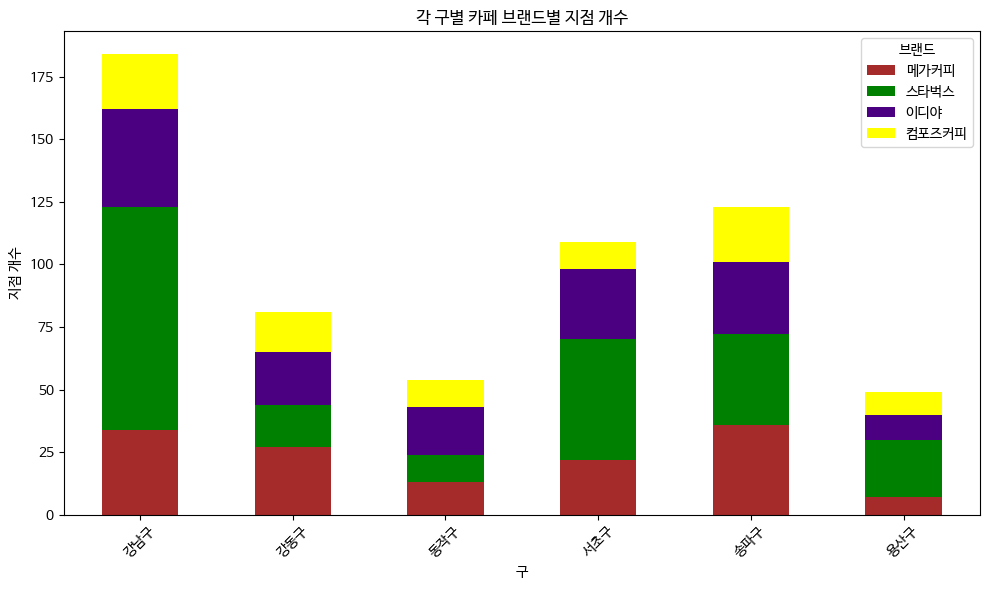

In [ ]:
# 각 구별로 카페 브랜드별 지점 개수를 계산
brand_counts = rich.groupby(['구', '브랜드']).size().unstack(fill_value=0)

# 브랜드별 색상 매핑
brand_colors = {
    '스타벅스': 'green',
    '이디야': 'indigo',
    '메가커피': 'brown',
    '컴포즈커피': 'yellow'
}

# 그래프 그리기
brand_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=[brand_colors.get(brand, 'gray') for brand in brand_counts.columns])
plt.title('각 구별 카페 브랜드별 지점 개수')
plt.xlabel('구')
plt.ylabel('지점 개수')
plt.xticks(rotation=45)
plt.legend(title='브랜드')
plt.tight_layout()
plt.show()

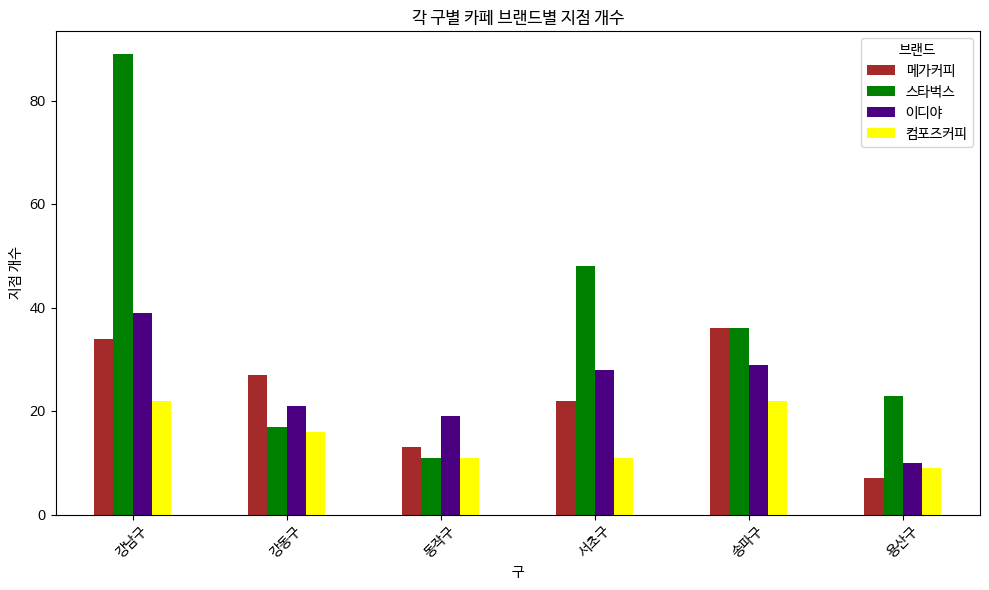

In [ ]:
# 그래프 그리기
brand_counts.plot(kind='bar', figsize=(10, 6), color=[brand_colors.get(brand, 'gray') for brand in brand_counts.columns])
plt.title('각 구별 카페 브랜드별 지점 개수')
plt.xlabel('구')
plt.ylabel('지점 개수')
plt.xticks(rotation=45)
plt.legend(title='브랜드')
plt.tight_layout()
plt.show()

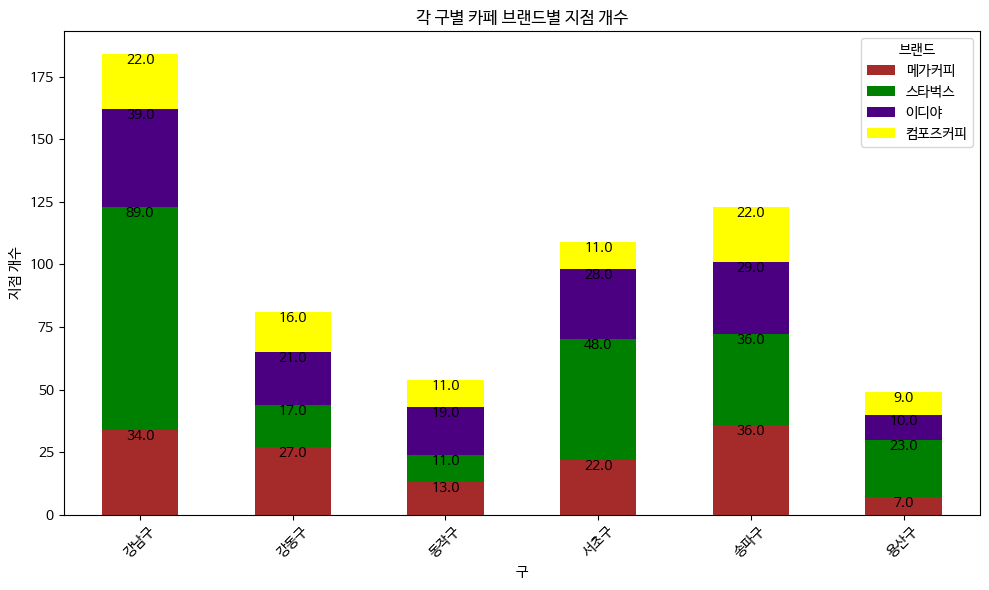

In [ ]:
# 각 구별로 카페 브랜드별 지점 개수를 계산
brand_counts = rich.groupby(['구', '브랜드']).size().unstack(fill_value=0)

# 브랜드별 색상 매핑
brand_colors = {
    '스타벅스': 'green',
    '이디야': 'indigo',
    '메가커피': 'brown',
    '컴포즈커피': 'yellow'
}

# 그래프 그리기
ax = brand_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=[brand_colors.get(brand, 'gray') for brand in brand_counts.columns])
plt.title('각 구별 카페 브랜드별 지점 개수')
plt.xlabel('구')
plt.ylabel('지점 개수')
plt.xticks(rotation=45)
plt.legend(title='브랜드')

# 각 막대의 가운데에 지점별 개수를 숫자로 표시
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='top')

plt.tight_layout()
plt.show()

## 강남구 브랜드별 지점 개수

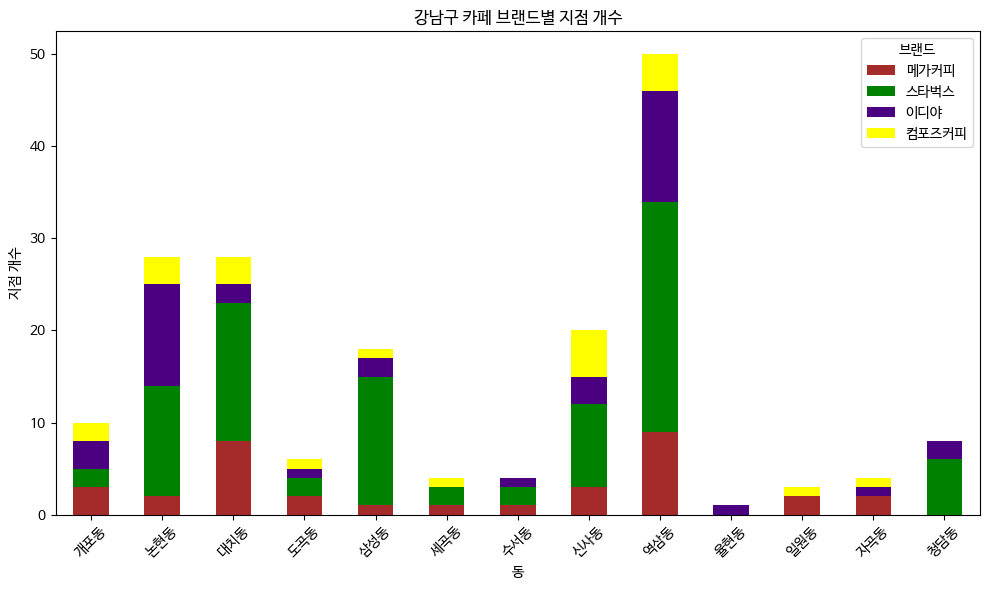

In [ ]:
# 각 동별로 카페 브랜드별 지점 개수를 계산
brand_counts = gangnam.groupby(['동', '브랜드']).size().unstack(fill_value=0)

# 브랜드별 색상 매핑
brand_colors = {
    '스타벅스': 'green',
    '이디야': 'indigo',
    '메가커피': 'brown',
    '컴포즈커피': 'yellow'
}

# 그래프 그리기
brand_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=[brand_colors.get(brand, 'gray') for brand in brand_counts.columns])
plt.title('강남구 카페 브랜드별 지점 개수')
plt.xlabel('동')
plt.ylabel('지점 개수')
plt.xticks(rotation=45)
plt.legend(title='브랜드')
plt.tight_layout()
plt.show()

## 강동구 브랜드별 지점 개수

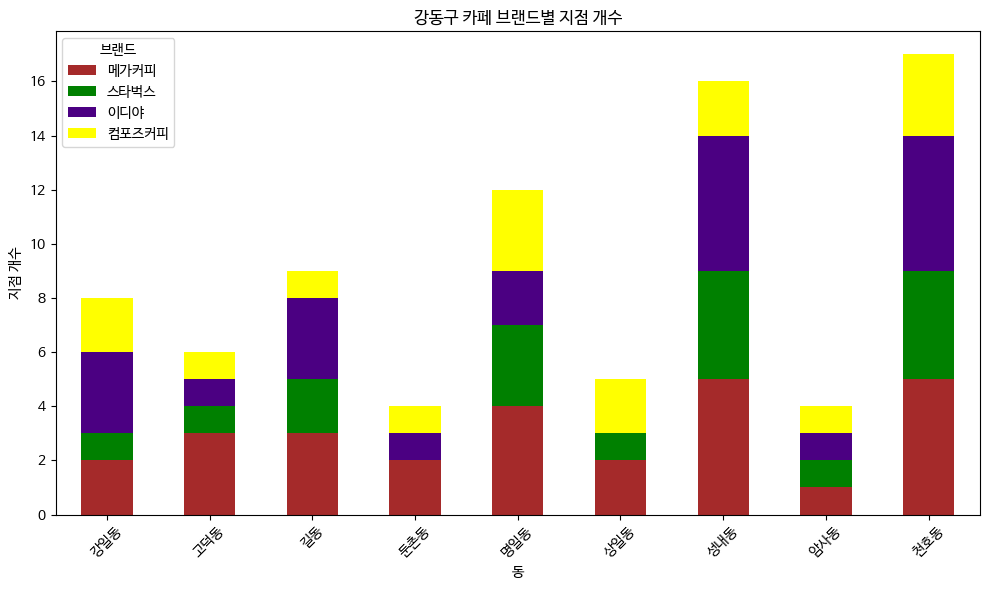

In [ ]:
# 각 동별로 카페 브랜드별 지점 개수를 계산
brand_counts = gangdong.groupby(['동', '브랜드']).size().unstack(fill_value=0)

# 브랜드별 색상 매핑
brand_colors = {
    '스타벅스': 'green',
    '이디야': 'indigo',
    '메가커피': 'brown',
    '컴포즈커피': 'yellow'
}

# 그래프 그리기
brand_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=[brand_colors.get(brand, 'gray') for brand in brand_counts.columns])
plt.title('강동구 카페 브랜드별 지점 개수')
plt.xlabel('동')
plt.ylabel('지점 개수')
plt.xticks(rotation=45)
plt.legend(title='브랜드')
plt.tight_layout()
plt.show()

## 동작구 브랜드별 지점 개수

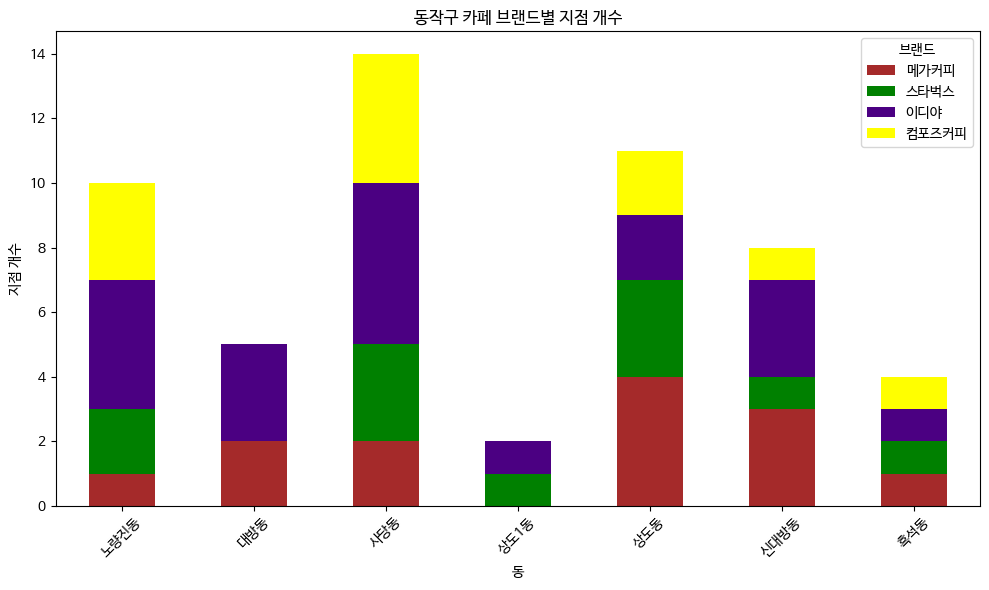

In [ ]:
# 각 동별로 카페 브랜드별 지점 개수를 계산
brand_counts = dongjak.groupby(['동', '브랜드']).size().unstack(fill_value=0)

# 브랜드별 색상 매핑
brand_colors = {
    '스타벅스': 'green',
    '이디야': 'indigo',
    '메가커피': 'brown',
    '컴포즈커피': 'yellow'
}

# 그래프 그리기
brand_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=[brand_colors.get(brand, 'gray') for brand in brand_counts.columns])
plt.title('동작구 카페 브랜드별 지점 개수')
plt.xlabel('동')
plt.ylabel('지점 개수')
plt.xticks(rotation=45)
plt.legend(title='브랜드')
plt.tight_layout()
plt.show()

## 서초구 브랜드별 지점 개수

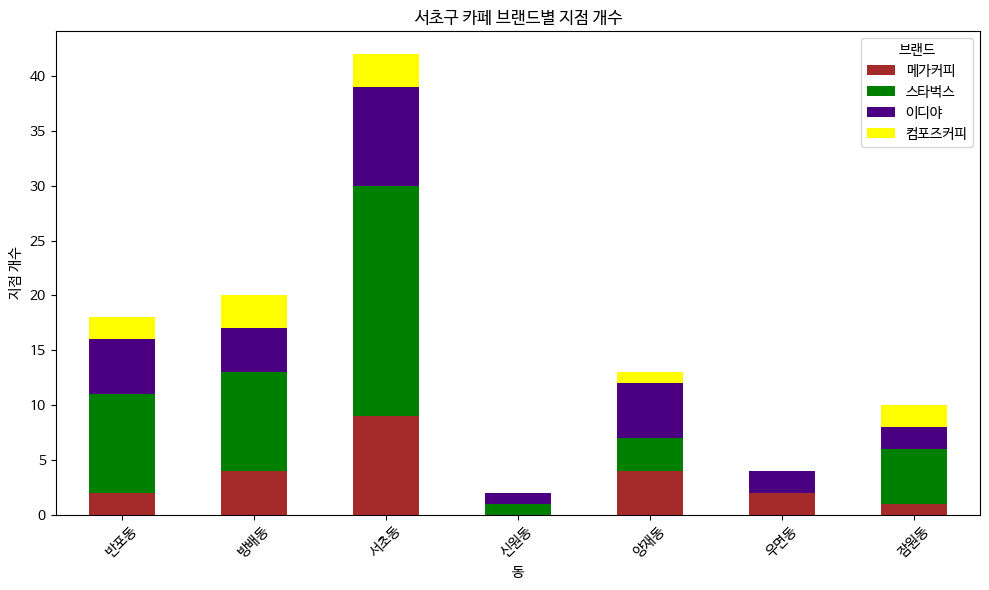

In [ ]:
# 각 동별로 카페 브랜드별 지점 개수를 계산
brand_counts = seocho.groupby(['동', '브랜드']).size().unstack(fill_value=0)

# 브랜드별 색상 매핑
brand_colors = {
    '스타벅스': 'green',
    '이디야': 'indigo',
    '메가커피': 'brown',
    '컴포즈커피': 'yellow'
}

# 그래프 그리기
brand_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=[brand_colors.get(brand, 'gray') for brand in brand_counts.columns])
plt.title('서초구 카페 브랜드별 지점 개수')
plt.xlabel('동')
plt.ylabel('지점 개수')
plt.xticks(rotation=45)
plt.legend(title='브랜드')
plt.tight_layout()
plt.show()

## 송파구 브랜드별 지점 개수

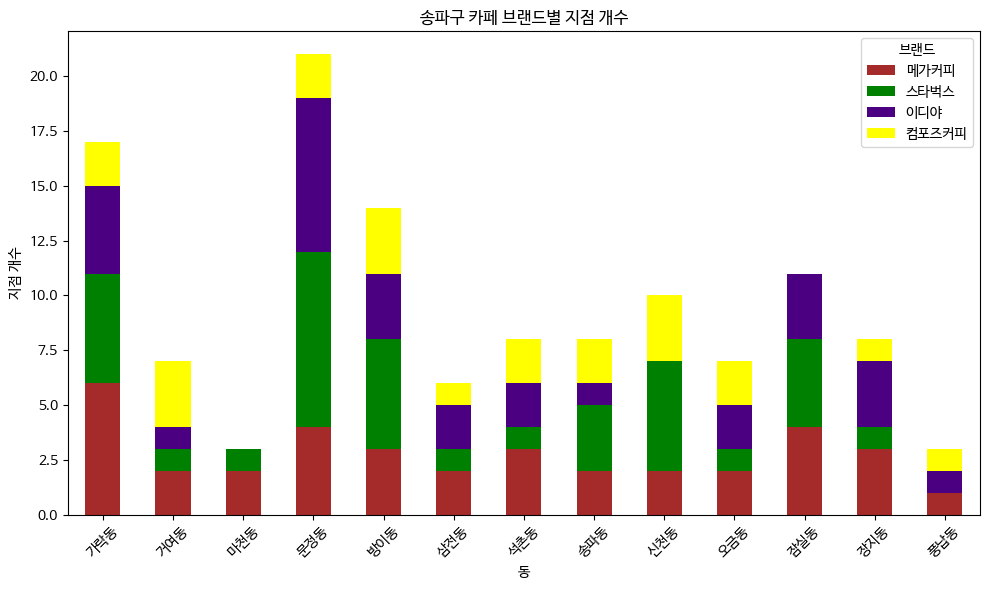

In [ ]:
# 각 동별로 카페 브랜드별 지점 개수를 계산
brand_counts = songpa.groupby(['동', '브랜드']).size().unstack(fill_value=0)

# 브랜드별 색상 매핑
brand_colors = {
    '스타벅스': 'green',
    '이디야': 'indigo',
    '메가커피': 'brown',
    '컴포즈커피': 'yellow'
}

# 그래프 그리기
brand_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=[brand_colors.get(brand, 'gray') for brand in brand_counts.columns])
plt.title('송파구 카페 브랜드별 지점 개수')
plt.xlabel('동')
plt.ylabel('지점 개수')
plt.xticks(rotation=45)
plt.legend(title='브랜드')
plt.tight_layout()
plt.show()

## 용산구 브랜드별 지점 개수

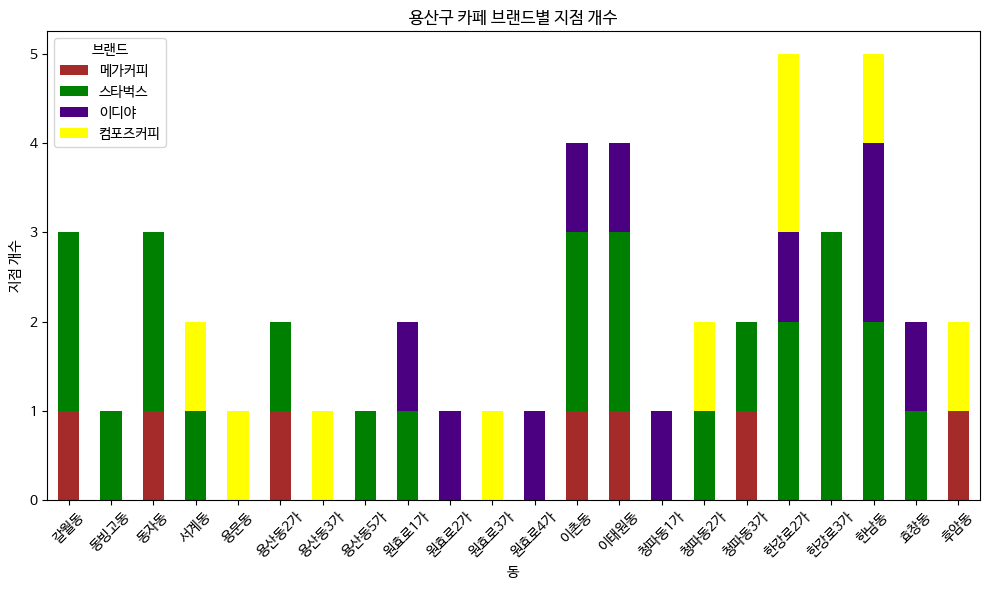

In [ ]:
# 각 동별로 카페 브랜드별 지점 개수를 계산
brand_counts = yongsan.groupby(['동', '브랜드']).size().unstack(fill_value=0)

# 브랜드별 색상 매핑
brand_colors = {
    '스타벅스': 'green',
    '이디야': 'indigo',
    '메가커피': 'brown',
    '컴포즈커피': 'yellow'
}

# 그래프 그리기
brand_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=[brand_colors.get(brand, 'gray') for brand in brand_counts.columns])
plt.title('용산구 카페 브랜드별 지점 개수')
plt.xlabel('동')
plt.ylabel('지점 개수')
plt.xticks(rotation=45)
plt.legend(title='브랜드')
plt.tight_layout()
plt.show()

## 지도 표시

In [ ]:
import folium

# 서울시 중심에 지도 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 카페 브랜드별 색깔 지정
brand_colors = {'스타벅스': 'green', '이디야': 'blue', '메가커피': 'gray', '컴포즈커피': 'yellow'}

# 카페 위치 정보를 지도에 표시
for index, row in rich.iterrows():
    brand = row['브랜드']
    lat = row['위도']
    lon = row['경도']

    # 해당 브랜드에 대한 마커를 생성하여 지도에 추가
    folium.Marker([lat, lon], popup=row['사업장명'], icon=folium.Icon(color=brand_colors.get(brand, 'gray'))).add_to(seoul_map)

# 지도 출력
seoul_map.save('seoul_cafe_map.html')

## 브랜드별 거리 확인

In [ ]:
rich_starbucks = rich[rich['브랜드'] == '스타벅스']
rich_ediya = rich[rich['브랜드'] == '이디야']
rich_mega = rich[rich['브랜드'] == '메가커피']
rich_compose = rich[rich['브랜드'] == '컴포즈커피']

In [ ]:
from haversine import haversine, Unit

# 두 매장 사이의 거리 계산 함수
def calculate_distance(lat1, lon1, lat2, lon2):
    coords_1 = (lat1, lon1)
    coords_2 = (lat2, lon2)
    return haversine(coords_1, coords_2, unit=Unit.METERS)

# 같은 구 내 매장 간 거리 구하기
def calculate_distances_within_gu(brand1_df, brand2_df):
    distances = []
    for _, row1 in brand1_df.iterrows():
        for _, row2 in brand2_df.iterrows():
            if row1['구'] == row2['구']:
                distance = calculate_distance(row1['위도'], row1['경도'], row2['위도'], row2['경도'])
                distances.append({
                    '매장명1': row1['사업장명'],
                    '위도1': row1['위도'],
                    '경도1': row1['경도'],
                    '구1': row1['구'],
                    '인허가일자1': row1['인허가일자'],
                    '매장명2': row2['사업장명'],
                    '위도2': row2['위도'],
                    '경도2': row2['경도'],
                    '구2': row2['구'],
                    '인허가일자2': row2['인허가일자'],
                    '거리': distance,
                    '단위': 'm'
                })
    return pd.DataFrame(distances)

In [ ]:
def calculate_date_difference(df):

    # 500m 이내의 매장들만 추출
    near = df[df['거리'] <= 500].copy()

    # 날짜 형식으로 변환
    near['인허가일자1'] = pd.to_datetime(near['인허가일자1'])
    near['인허가일자2'] = pd.to_datetime(near['인허가일자2'])

    # 인허가일자 차이 계산
    near['인허가일자_차이'] = abs(near['인허가일자1'] - near['인허가일자2']).dt.days

    return near

### 스타벅스 & 이디야

In [ ]:
se_distances = calculate_distances_within_gu(rich_starbucks, rich_ediya)
se_distances

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위
0,스타벅스중앙대점,37.506966,126.955236,동작구,2016-10-27,이디야노량진드림스퀘어점,37.514325,126.936493,동작구,2021-02-23,1844.630358,m
1,스타벅스중앙대점,37.506966,126.955236,동작구,2016-10-27,이디야 상도파크엘점,37.500702,126.943864,동작구,2024-01-04,1221.235718,m
2,스타벅스중앙대점,37.506966,126.955236,동작구,2016-10-27,이디야커피흑석역점,37.507645,126.961847,동작구,2022-10-25,588.072237,m
3,스타벅스중앙대점,37.506966,126.955236,동작구,2016-10-27,이디야커피사당점,37.480747,126.978612,동작구,2010-07-01,3571.137691,m
4,스타벅스중앙대점,37.506966,126.955236,동작구,2016-10-27,이디야커피 노량진역사,37.513585,126.938014,동작구,2014-10-13,1687.905024,m
...,...,...,...,...,...,...,...,...,...,...,...,...
6650,스타벅스이태원역점,37.534320,126.991931,용산구,2018-09-11,이디야커피순천향병원점,37.533048,127.003048,용산구,2015-10-07,990.336353,m
6651,스타벅스이태원역점,37.534320,126.991931,용산구,2018-09-11,이디야IBK고객센터,37.535075,127.004122,용산구,2012-03-22,1078.209858,m
6652,스타벅스이태원역점,37.534320,126.991931,용산구,2018-09-11,이디야용산원효점,37.532509,126.948723,용산구,2020-03-26,3815.285953,m
6653,스타벅스이태원역점,37.534320,126.991931,용산구,2018-09-11,이디야커피용산청파점,37.549459,126.966523,용산구,2020-10-28,2802.234653,m


In [ ]:
se_near = calculate_date_difference(se_distances)
se_near

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위,인허가일자_차이
41,스타벅스 사당역점,37.478493,126.978461,동작구,2009-12-23,이디야커피사당점,37.480747,126.978612,동작구,2010-07-01,251.050168,m,190
49,스타벅스 사당역점,37.478493,126.978461,동작구,2009-12-23,이디야커피사당역점,37.477168,126.974650,동작구,2016-12-05,367.080260,m,2539
65,스타벅스 남성역점,37.484167,126.969788,동작구,2019-08-22,이디야 남성역점,37.483802,126.970542,동작구,2014-06-26,77.943452,m,1883
74,스타벅스 남성역점,37.484167,126.969788,동작구,2019-08-22,이디야 총신대점,37.485094,126.965913,동작구,2018-12-05,357.063157,m,260
89,스타벅스 보라매공원R점,37.492110,126.920634,동작구,2019-01-21,이디야,37.491332,126.921215,동작구,2002-10-25,100.634257,m,5932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6589,스타벅스효창공원앞역점,37.539574,126.960613,용산구,2019-11-14,이디야용문점,37.535845,126.958247,용산구,2019-07-10,464.161733,m,127
6599,스타벅스 용산전자랜드점,37.532814,126.956837,용산구,2021-11-03,이디야용문점,37.535845,126.958247,용산구,2019-07-10,359.168012,m,847
6618,스타벅스용산리첸시아점,37.538276,126.964473,용산구,2020-07-08,이디야,37.540648,126.966327,용산구,2015-03-02,310.321155,m,1955
6633,스타벅스 서울역사점,37.552395,126.968178,용산구,2021-04-14,이디야커피용산청파점,37.549459,126.966523,용산구,2020-10-28,357.585692,m,168


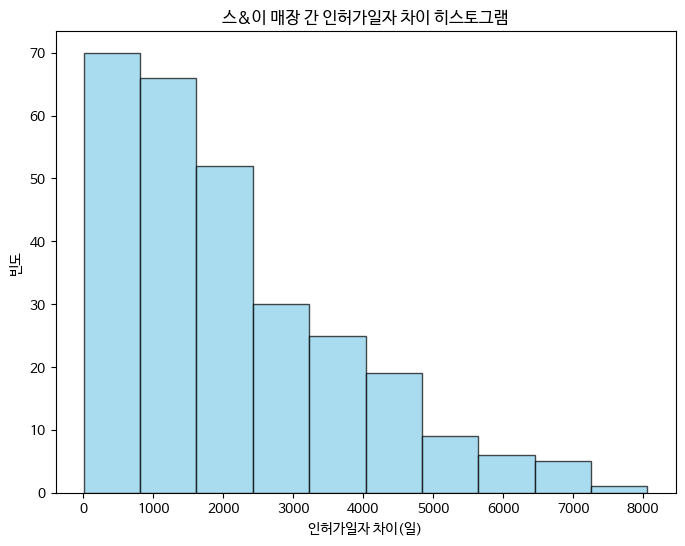

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(se_near['인허가일자_차이'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('스&이 매장 간 인허가일자 차이 히스토그램')
plt.xlabel('인허가일자 차이(일)')
plt.ylabel('빈도')
plt.show()

In [ ]:
se_near[(se_near['인허가일자_차이'] <= 180) & (se_near['인허가일자1'] < se_near['인허가일자2'])]

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위,인허가일자_차이
3170,스타벅스논현힐탑,37.511577,127.029307,강남구,2011-08-25,이디야 커피,37.509944,127.032812,강남구,2011-11-28,358.560531,m,95
3316,스타벅스 르네상스사거리점,37.502592,127.041212,강남구,2010-03-17,이디야커피,37.503805,127.045177,강남구,2010-08-06,374.816218,m,142
4832,스타벅스커피 학동사거리점,37.522402,127.035073,강남구,2015-09-09,이디야 도산사거리점,37.520407,127.033205,강남구,2015-09-14,276.276752,m,5
6100,스타벅스 천호로데오점,37.537835,127.124451,강동구,2015-07-27,이디야,37.538242,127.123456,강동구,2015-12-02,98.664754,m,128


### 이디야 & 메가커피

In [ ]:
em_distances = calculate_distances_within_gu(rich_ediya, rich_mega)
em_distances

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위
0,이디야노량진드림스퀘어점,37.514325,126.936493,동작구,2021-02-23,메가엠지씨커피 중대후문점,37.505075,126.950224,동작구,2023-04-27,1588.914800,m
1,이디야노량진드림스퀘어점,37.514325,126.936493,동작구,2021-02-23,메가엠지씨커피 성대시장점,37.499944,126.929760,동작구,2023-07-24,1705.754377,m
2,이디야노량진드림스퀘어점,37.514325,126.936493,동작구,2021-02-23,메가엠지씨커피 대림성모점,37.490477,126.905544,동작구,2023-09-13,3805.903189,m
3,이디야노량진드림스퀘어점,37.514325,126.936493,동작구,2021-02-23,메가엠지씨커피 동작대방점,37.508995,126.929440,동작구,2023-08-23,859.127993,m
4,이디야노량진드림스퀘어점,37.514325,126.936493,동작구,2021-02-23,메가엠지씨커피 동작남성점,37.483496,126.971935,동작구,2020-07-31,4639.722649,m
...,...,...,...,...,...,...,...,...,...,...,...,...
3865,이디야커피 이태원역점,37.534246,126.990542,용산구,2022-05-10,메가엠지씨커피 이태원점,37.534825,126.992779,용산구,2023-08-30,207.488401,m
3866,이디야커피 이태원역점,37.534246,126.990542,용산구,2022-05-10,메가엠지씨커피 용산후암점,37.549802,126.974704,용산구,2023-02-24,2222.988503,m
3867,이디야커피 이태원역점,37.534246,126.990542,용산구,2022-05-10,메가커피숙대점,37.543060,126.969328,용산구,2020-04-23,2111.645273,m
3868,이디야커피 이태원역점,37.534246,126.990542,용산구,2022-05-10,메가엠지씨커피 서울역점,37.554331,126.969319,용산구,2021-09-06,2913.610355,m


In [ ]:
em_near = calculate_date_difference(em_distances)
em_near

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위,인허가일자_차이
5,이디야노량진드림스퀘어점,37.514325,126.936493,동작구,2021-02-23,메가커피 노량진역점,37.513228,126.936893,동작구,2022-07-11,126.924544,m,503
33,이디야커피흑석역점,37.507645,126.961847,동작구,2022-10-25,메가엠지씨커피 중앙대점,37.507842,126.957974,동작구,2022-06-16,342.389238,m,131
49,이디야커피사당점,37.480747,126.978612,동작구,2010-07-01,메가엠지씨커피 이수역점,37.484761,126.978630,동작구,2021-12-16,446.328117,m,4186
57,이디야커피 노량진역사,37.513585,126.938014,동작구,2014-10-13,메가커피 노량진역점,37.513228,126.936893,동작구,2022-07-11,106.597891,m,2828
67,이디야(대림성모점),37.490357,126.905218,동작구,2012-08-10,메가엠지씨커피 대림성모점,37.490477,126.905544,동작구,2023-09-13,31.752462,m,4051
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,이디야커피 강동성내점,37.530482,127.126968,강동구,2022-07-06,메가엠지씨커피 성내동농협교차로점,37.530005,127.128668,강동구,2023-12-22,158.976027,m,534
3820,이디야커피,37.520699,126.972302,용산구,2014-03-19,메가엠지씨커피동부이촌점,37.519330,126.972137,용산구,2018-11-23,152.963506,m,1710
3822,이디야,37.540648,126.966327,용산구,2015-03-02,메가엠지씨커피 숙명여대점,37.544545,126.965152,용산구,2023-08-25,445.541511,m,3098
3825,이디야,37.540648,126.966327,용산구,2015-03-02,메가커피숙대점,37.543060,126.969328,용산구,2020-04-23,376.759003,m,1879


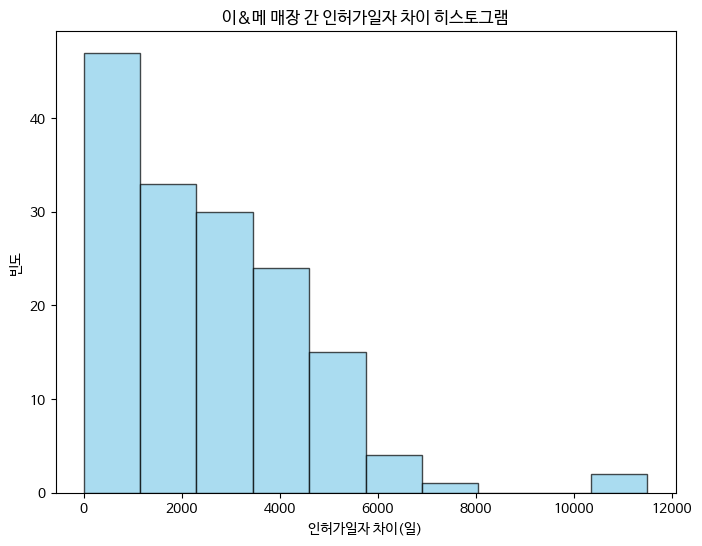

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(em_near['인허가일자_차이'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('이&메 매장 간 인허가일자 차이 히스토그램')
plt.xlabel('인허가일자 차이(일)')
plt.ylabel('빈도')
plt.show()

In [ ]:
em_near[(em_near['인허가일자_차이'] <= 180) & (em_near['인허가일자1'] < em_near['인허가일자2'])]

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위,인허가일자_차이
964,이디야커피 삼성중앙역점,37.513872,127.050367,강남구,2022-04-07,메가엠지씨커피 삼성중앙역점,37.512564,127.049914,강남구,2022-05-10,150.863827,m,33
999,이디야커피 압구정로데오역점,37.527534,127.035938,강남구,2022-10-17,메가엠지씨커피 압구정로데오역점,37.527921,127.036011,강남구,2023-03-24,43.517135,m,158
2078,이디야커피 강남대치점,37.501434,127.049438,강남구,2020-07-13,메가엠지씨커피 선릉점,37.503251,127.048140,강남구,2020-10-08,232.217356,m,87
2107,이디야 삼성대치점,37.500420,127.060181,강남구,2021-12-01,메가엠지씨커피 대치사거리점,37.502675,127.055590,강남구,2022-04-27,476.361024,m,147
2834,이디야커피 문정테라타워점,37.485172,127.119434,송파구,2017-02-02,메가커피,37.488012,127.118059,송파구,2017-06-21,338.246028,m,139
3395,이디야커피 강동신명초교점,37.541501,127.144624,강동구,2021-10-26,메가엠지씨커피 길동복조리시장점,37.541052,127.141091,강동구,2022-02-21,315.459562,m,118


### 메가커피 & 컴포즈커피

In [ ]:
mc_distances = calculate_distances_within_gu(rich_mega, rich_compose)
mc_distances

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위
0,메가엠지씨커피 중대후문점,37.505075,126.950224,동작구,2023-04-27,컴포즈커피 숭실대점,37.496943,126.950649,동작구,2023-06-05,905.124166,m
1,메가엠지씨커피 중대후문점,37.505075,126.950224,동작구,2023-04-27,컴포즈커피 노량진점,37.512624,126.940848,동작구,2018-06-27,1178.344628,m
2,메가엠지씨커피 중대후문점,37.505075,126.950224,동작구,2023-04-27,컴포즈 노량진2동점,37.512882,126.935431,동작구,2022-05-31,1567.221091,m
3,메가엠지씨커피 중대후문점,37.505075,126.950224,동작구,2023-04-27,컴포즈커피 이수중앙점,37.484566,126.976029,동작구,2020-08-03,3222.418170,m
4,메가엠지씨커피 중대후문점,37.505075,126.950224,동작구,2023-04-27,컴포즈커피 성대시장점,37.499484,126.929035,동작구,2019-06-24,1969.833856,m
...,...,...,...,...,...,...,...,...,...,...,...,...
2415,메가엠지씨커피동부이촌점,37.519330,126.972137,용산구,2018-11-23,컴포즈커피 용산원효로점,37.534815,126.955880,용산구,2024-01-08,2240.559141,m
2416,메가엠지씨커피동부이촌점,37.519330,126.972137,용산구,2018-11-23,컴포즈커피 한남순천향점,37.533206,127.002249,용산구,2023-02-20,3071.162668,m
2417,메가엠지씨커피동부이촌점,37.519330,126.972137,용산구,2018-11-23,컴포즈커피 삼각지역점,37.534658,126.972044,용산구,2023-02-23,1704.439080,m
2418,메가엠지씨커피동부이촌점,37.519330,126.972137,용산구,2018-11-23,컴포즈커피 숙명여대점,37.544963,126.962851,용산구,2023-02-10,2965.541179,m


In [ ]:
mc_near = calculate_date_difference(mc_distances)
mc_near

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위,인허가일자_차이
15,메가엠지씨커피 성대시장점,37.499944,126.929760,동작구,2023-07-24,컴포즈커피 성대시장점,37.499484,126.929035,동작구,2019-06-24,81.935532,m,1491
28,메가엠지씨커피 대림성모점,37.490477,126.905544,동작구,2023-09-13,컴포즈커피대림성모병원점,37.490559,126.905437,동작구,2015-11-03,13.104189,m,2871
47,메가엠지씨커피 동작남성점,37.483496,126.971935,동작구,2020-07-31,컴포즈커피 이수중앙점,37.484566,126.976029,동작구,2020-08-03,380.273352,m,3
54,메가엠지씨커피 동작남성점,37.483496,126.971935,동작구,2020-07-31,컴포즈커피 남성역점,37.484634,126.969480,동작구,2021-09-10,250.856549,m,406
56,메가커피 노량진역점,37.513228,126.936893,동작구,2022-07-11,컴포즈커피 노량진점,37.512624,126.940848,동작구,2018-06-27,355.259468,m,1475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,메가엠지씨커피 강동구청점,37.530535,127.119321,강동구,2018-09-13,컴포즈커피 강동구청점,37.530734,127.118610,강동구,2016-02-25,66.504355,m,931
2332,메가엠지씨커피 천호로데오점,37.538868,127.124290,강동구,2018-11-19,컴포즈커피 엔터식스 천호점,37.538504,127.122222,강동구,2020-08-11,186.808848,m,631
2343,메가엠지씨커피 강동보훈사거리점,37.529241,127.140090,강동구,2023-01-05,컴포즈커피 둔촌동약수터점,37.532358,127.138814,강동구,2023-09-21,364.402198,m,259
2373,메가엠지씨커피 숙명여대점,37.544545,126.965152,용산구,2023-08-25,컴포즈커피 숙명여대점,37.544963,126.962851,용산구,2023-02-10,208.130571,m,196


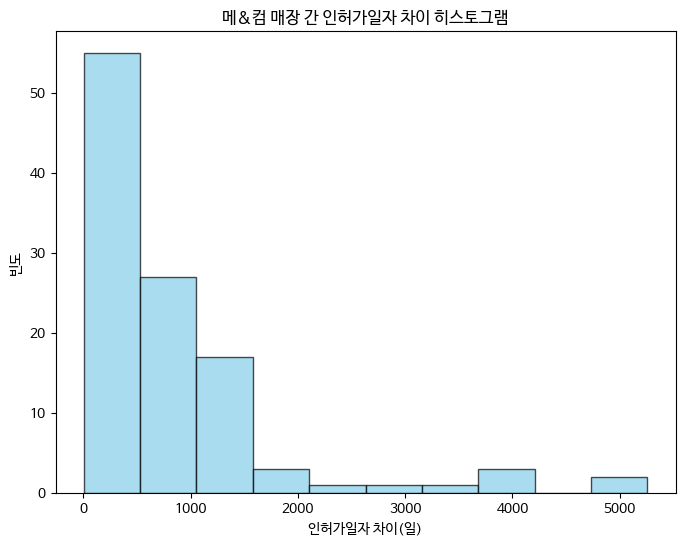

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(mc_near['인허가일자_차이'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('메&컴 매장 간 인허가일자 차이 히스토그램')
plt.xlabel('인허가일자 차이(일)')
plt.ylabel('빈도')
plt.show()

In [ ]:
mc_near[(mc_near['인허가일자_차이'] <= 180) & (mc_near['인허가일자1'] < mc_near['인허가일자2'])]

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위,인허가일자_차이
47,메가엠지씨커피 동작남성점,37.483496,126.971935,동작구,2020-07-31,컴포즈커피 이수중앙점,37.484566,126.976029,동작구,2020-08-03,380.273352,m,3
335,메가엠지씨커피 함지박사거리점,37.493071,126.987731,서초구,2021-07-15,컴포즈 커피 방배카페거리점,37.493223,126.983858,서초구,2021-09-23,342.164256,m,70
1033,메가엠지씨커피 디에이치자이개포점,37.490934,127.072230,강남구,2021-12-15,컴포즈커피 개포중앙점,37.492694,127.072738,강남구,2022-05-24,200.768640,m,160
1384,메가엠지씨커피 잠실나루역점,37.520865,127.101423,송파구,2022-07-11,컴포즈커피 잠실나루역점,37.520031,127.099726,송파구,2022-12-20,176.061991,m,162
1473,메가엠지씨커피 잠실트리지움점,37.507755,127.085041,송파구,2022-08-01,컴포즈커피 송파삼전점,37.503504,127.086610,송파구,2022-10-12,492.563255,m,72
1608,메가엠지씨커피 송파역점,37.497519,127.104336,송파구,2021-04-27,컴포즈커피 송파사거리점,37.501568,127.105442,송파구,2021-08-30,460.659122,m,125
2094,메가엠지씨커피 둔촌동역점,37.527398,127.132662,강동구,2021-05-24,컴포즈커피 둔촌동역점,37.528903,127.132705,강동구,2021-11-09,167.396867,m,169
2106,메가엠지씨커피 명일역점,37.552083,127.140965,강동구,2020-06-30,컴포즈커피 명일역점,37.552083,127.140965,강동구,2020-07-28,0.000000,m,28
2224,메가엠지씨커피 강동역점,37.535549,127.132032,강동구,2022-04-11,컴포즈커피 길동중앙점,37.536857,127.136405,강동구,2022-05-18,412.071975,m,37
2386,메가엠지씨커피 용산후암점,37.549802,126.974704,용산구,2023-02-24,컴포즈커피 후암시장점,37.550122,126.972699,용산구,2023-05-26,180.342872,m,91


## 브랜드별 평균 면적 (전체 구)

In [ ]:
df['소재지면적'] = df['소재지면적'].str.replace(',', '').astype(float) # 숫자형으로 변환

In [ ]:
average_area = df.groupby(['구', '브랜드'])['소재지면적'].mean().reset_index()

In [ ]:
average_area

,구,브랜드,소재지면적
0,강남구,메가커피,47.239118
1,강남구,스타벅스,251.796742
2,강남구,이디야,106.178974
3,강남구,컴포즈커피,35.978636
4,강동구,메가커피,56.162222
...,...,...,...
95,중구,컴포즈커피,45.798667
96,중랑구,메가커피,65.371500
97,중랑구,스타벅스,282.582500
98,중랑구,이디야,82.814400


In [ ]:
average_area = average_area.pivot(index='구', columns='브랜드', values='소재지면적').reset_index()
average_area.columns.name = None
average_area.set_index('구', inplace=True)
average_area

,메가커피,스타벅스,이디야,컴포즈커피
구,,,,
강남구,47.239118,251.796742,106.178974,35.978636
강동구,56.162222,346.999412,77.364762,50.371250
강북구,67.883750,246.158333,93.656364,49.456000
강서구,58.816667,286.192593,79.981071,49.318824
관악구,56.535000,321.816667,71.468750,54.195833
광진구,69.312667,253.222222,91.085455,60.172727
구로구,58.059000,250.840714,77.891364,45.517391
금천구,53.108462,184.662308,88.656667,43.417647
노원구,54.616333,288.316429,68.233125,55.556667


In [ ]:
# 브랜드별 색상 매핑
brand_colors = {
    '스타벅스': '#00704A',
    '이디야': '#13235D',
    '메가커피': '#FFDC00',
    '컴포즈커피': '#3E3532'
}

In [ ]:
brand_counts = df.groupby(['구', '브랜드']).size().unstack(fill_value=0)
brand_counts = brand_counts[['스타벅스', '이디야', '메가커피', '컴포즈커피']]
brand_counts

브랜드,스타벅스,이디야,메가커피,컴포즈커피
구,,,,
강남구,89,39,34,22
강동구,17,21,27,16
강북구,6,11,16,5
강서구,27,28,36,34
관악구,12,24,26,12
광진구,18,18,15,12
구로구,14,22,30,23
금천구,13,18,13,17
노원구,14,16,30,15


In [ ]:
average_area = average_area[['스타벅스', '이디야', '메가커피', '컴포즈커피']]
average_area

,스타벅스,이디야,메가커피,컴포즈커피
구,,,,
강남구,251.796742,106.178974,47.239118,35.978636
강동구,346.999412,77.364762,56.162222,50.371250
강북구,246.158333,93.656364,67.883750,49.456000
강서구,286.192593,79.981071,58.816667,49.318824
관악구,321.816667,71.468750,56.535000,54.195833
광진구,253.222222,91.085455,69.312667,60.172727
구로구,250.840714,77.891364,58.059000,45.517391
금천구,184.662308,88.656667,53.108462,43.417647
노원구,288.316429,68.233125,54.616333,55.556667


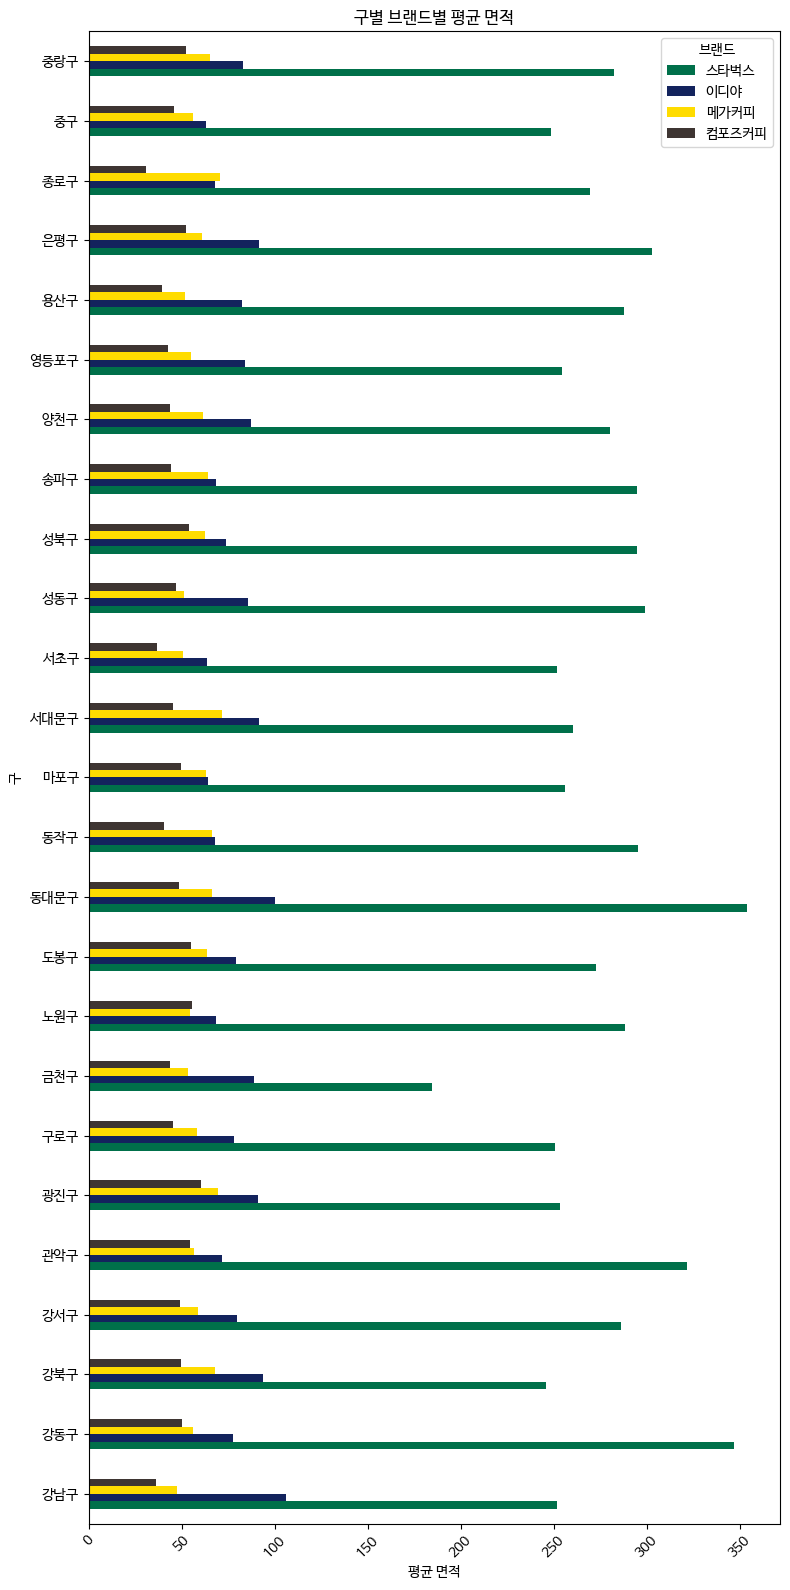

In [ ]:
average_area.plot(kind='barh', figsize=(8, 16), color=[brand_colors.get(brand, 'gray') for brand in brand_counts.columns])
plt.title('구별 브랜드별 평균 면적')
plt.xlabel('평균 면적')
plt.ylabel('구')
plt.xticks(rotation=45)
plt.legend(title='브랜드')
plt.tight_layout()
plt.show()

## 지역구 1km2 면적 당 지점 수 (전체 구)

In [ ]:
area = {
'서초구':47.03,
'강서구':41.43,
'강남구':39.54,
'노원구':35.42,
'송파구':33.88,
'은평구':29.71,
'관악구':29.57,
'강동구':24.58,
'성북구':24.57,
'영등포구':24.57,
'종로구':23.91,
'마포구':23.88,
'강북구':23.60,
'용산구':21.87,
'도봉구':20.70,
'구로구':20.11,
'중랑구':18.50,
'서대문구':17.61,
'양천구':17.40,
'광진구':17.05,
'성동구':16.85,
'동작구':16.35,
'동대문구':14.21,
'금천구':13.01,
'중구':9.96,
}


# 면적당 브랜드 지점 개수 계산
brand_density = brand_counts.div(list(area.values()), axis=0)
brand_density

브랜드,스타벅스,이디야,메가커피,컴포즈커피
구,,,,
강남구,1.892409,0.829258,0.722943,0.467787
강동구,0.410331,0.506879,0.651702,0.386194
강북구,0.151745,0.278199,0.404654,0.126454
강서구,0.762281,0.790514,1.016375,0.959910
관악구,0.354191,0.708383,0.767414,0.354191
광진구,0.605857,0.605857,0.504881,0.403904
구로구,0.473453,0.743997,1.014542,0.777815
금천구,0.528885,0.732303,0.528885,0.691619
노원구,0.569801,0.651201,1.221001,0.610501


In [ ]:
brand_density = brand_density[['스타벅스', '이디야', '메가커피', '컴포즈커피']]
brand_density

브랜드,스타벅스,이디야,메가커피,컴포즈커피
구,,,,
강남구,1.892409,0.829258,0.722943,0.467787
강동구,0.410331,0.506879,0.651702,0.386194
강북구,0.151745,0.278199,0.404654,0.126454
강서구,0.762281,0.790514,1.016375,0.959910
관악구,0.354191,0.708383,0.767414,0.354191
광진구,0.605857,0.605857,0.504881,0.403904
구로구,0.473453,0.743997,1.014542,0.777815
금천구,0.528885,0.732303,0.528885,0.691619
노원구,0.569801,0.651201,1.221001,0.610501


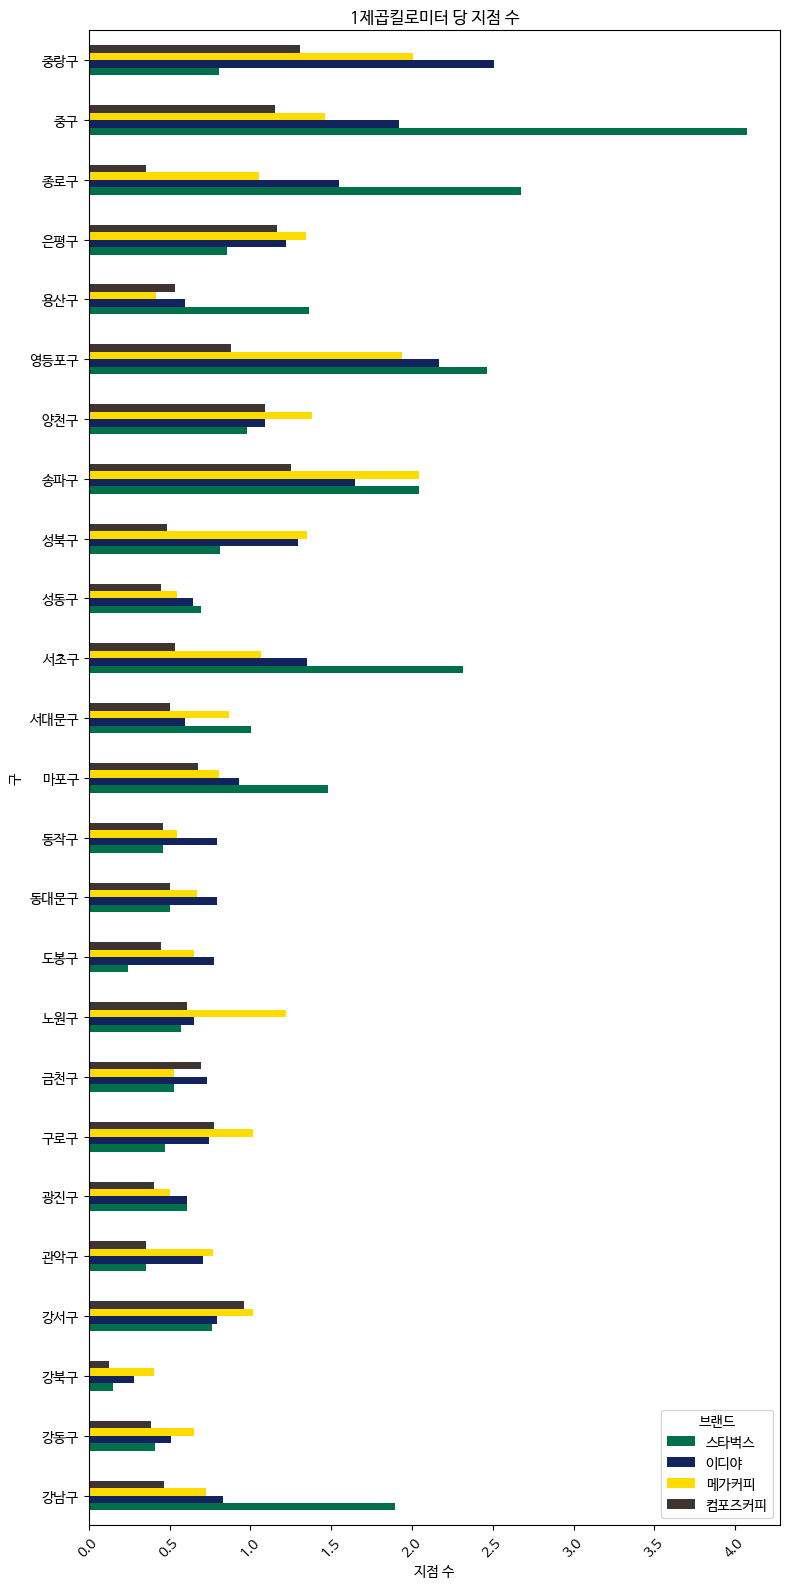

In [ ]:
brand_density.plot(kind='barh', figsize=(8, 16), color=[brand_colors.get(brand, 'gray') for brand in brand_counts.columns])
plt.title('1제곱킬로미터 당 지점 수')
plt.xlabel('지점 수')
plt.ylabel('구')
plt.xticks(rotation=45)
plt.legend(title='브랜드')
plt.tight_layout()
plt.show()

## 설립이전 데이터들 삭제하기

In [ ]:
starbucks = df[df['사업장명'].str.contains('스타벅스')]
ediya = df[df['사업장명'].str.contains('이디야')]
mega = df[df['사업장명'].str.contains('메가')]
compose = df[df['사업장명'].str.contains('컴포즈|COMPOSE')]

In [ ]:
starbucks[starbucks['인허가일자'] < '1999-07-17']  # 스타벅스 1호점 '1997-07-17' 이대점

,인허가일자,소재지면적,지번주소,도로명주소,도로명우편번호,사업장명,구,동,인허가연도,인허가월,인허가일,경도,위도,브랜드
208,1998-03-04,432.28,"서울특별시 용산구 청파동3가 111-35 가동 지상1,2,3층","서울특별시 용산구 청파로47길 57 (청파동3가, 가동 지상1,2,3층)",4313.0,스타벅스숙대점,용산구,청파동3가,1998,3,4,126.964348,37.544620,스타벅스
342,1999-07-15,217.56,"서울특별시 서대문구 대현동 54-4 외 2필지(54-5,54-31) 신흥빌딩 1~3층","서울특별시 서대문구 이화여대길 34, 1~3층 (대현동)",3767.0,스타벅스 이대R점,서대문구,대현동,1999,7,15,126.943067,37.558492,스타벅스


In [ ]:
ediya[ediya['인허가일자'] < '2001-04-01'] # 이디야 1호점 '2001-03' 중앙대점

,인허가일자,소재지면적,지번주소,도로명주소,도로명우편번호,사업장명,구,동,인허가연도,인허가월,인허가일,경도,위도,브랜드
1070,1992-02-26,65.93,서울특별시 서초구 서초동 1451-1 원일빌딩 1층,"서울특별시 서초구 반포대로 32 (서초동,원일빌딩 1층)",6716.0,이디야 예술의전당점,서초구,서초동,1992,2,26,127.009248,37.483443,이디야


In [ ]:
mega[mega['인허가일자'] < '2015-12-01'] # 메가 1호점 '2015-12-23' 홍대점

,인허가일자,소재지면적,지번주소,도로명주소,도로명우편번호,사업장명,구,동,인허가연도,인허가월,인허가일,경도,위도,브랜드
1226,2001-05-09,10,서울특별시 중구 명동1가 34-1 1층,"서울특별시 중구 명동9길 13, 1층 (명동1가)",4534.0,메가엠지씨커피 명동길점,중구,명동1가,2001,5,9,126.981894,37.564406,메가커피
1233,2013-08-01,94.67,서울특별시 성동구 옥수동 365-20 지상1층,"서울특별시 성동구 한림말5길 9, 지상1층 (옥수동)",4735.0,메가엠지씨커피 옥수역점,성동구,옥수동,2013,8,1,127.013850,37.542023,메가커피
1318,2012-02-24,44.16,서울특별시 강동구 천호동 332-2 (주)아이앤유앤아이빌딩,서울특별시 강동구 올림픽로 715 (주)아이앤유앤아이빌딩 1층 101호 (천호동),5245.0,메가엠지씨커피 천호공원점,강동구,천호동,2012,2,24,127.122642,37.545282,메가커피
1330,2015-02-26,88.11,서울특별시 강서구 화곡동 98-60 1층,"서울특별시 강서구 까치산로4길 3, 1층 (화곡동, 본동)",7722.0,메가엠지씨커피 화곡본동시장점,강서구,화곡동,2015,2,26,126.841256,37.542480,메가커피
1368,2012-06-29,33.2,서울특별시 영등포구 신길동 4326 1층(일부),"서울특별시 영등포구 여의대방로 87 (신길동, 1층(일부))",7434.0,메가엠지씨커피 보라매공원점,영등포구,신길동,2012,6,29,126.913439,37.497176,메가커피
1385,2010-05-04,46.92,서울특별시 종로구 숭인동 81-14,서울특별시 종로구 지봉로 52 (숭인동),3113.0,메가엠지씨커피 동묘숭인점,종로구,숭인동,2010,5,4,127.012981,37.574643,메가커피
1411,2014-06-23,70,서울특별시 광진구 구의동 236-28 1층,"서울특별시 광진구 자양로 170, 1층 (구의동)",5038.0,메가엠지씨커피 구의중앙점,광진구,구의동,2014,6,23,127.081715,37.542796,메가커피
1443,2011-07-22,70.07,서울특별시 성북구 정릉동 284-16,서울특별시 성북구 보국문로 77 (정릉동),2709.0,메가엠지씨커피(정릉보국문점),성북구,정릉동,2011,7,22,127.005716,37.611142,메가커피
1490,2011-03-28,40.6,서울특별시 은평구 응암동 578-98,"서울특별시 은평구 응암로 243, 1층 (응암동)",3457.0,메가엠지씨커피 신응암시장점,은평구,응암동,2011,3,28,126.914926,37.593699,메가커피
1493,2007-06-05,64.09,서울특별시 은평구 구산동 1-1 1층,"서울특별시 은평구 연서로 137, 1층 (구산동)",3412.0,메가엠지씨커피 구산역점,은평구,구산동,2007,6,5,126.913913,37.611152,메가커피


In [ ]:
mega[mega['사업장명'].str.contains('홍대')]

,인허가일자,소재지면적,지번주소,도로명주소,도로명우편번호,사업장명,구,동,인허가연도,인허가월,인허가일,경도,위도,브랜드
1184,2023-09-05,99,서울특별시 마포구 서교동 338-18,"서울특별시 마포구 와우산로 100, 1층 일부호 (서교동)",4059.0,메가엠지씨커피 홍대정문점,마포구,서교동,2023,9,5,126.921814,37.552836,메가커피
1300,2017-07-24,118.35,서울특별시 마포구 동교동 164-22,"서울특별시 마포구 홍익로6길 48 (동교동, 1층일부)",4050.0,메가엠지씨커피 홍대입구역점,마포구,동교동,2017,7,24,126.921352,37.556201,메가커피


In [ ]:
compose[compose['인허가일자'] < '2015-01-01'] # 컴포즈 1호 직영점 '2015'

,인허가일자,소재지면적,지번주소,도로명주소,도로명우편번호,사업장명,구,동,인허가연도,인허가월,인허가일,경도,위도,브랜드
1710,2007-12-04,144.8,서울특별시 구로구 구로동 3-25 신도림테크노마트 지하1층 BS 001호,"서울특별시 구로구 새말로 97 (구로동,신도림테크노마트 지하1층 BS 001호)",8288.0,컴포즈커피 신도림역사점,구로구,구로동,2007,12,4,126.887429,37.506974,컴포즈커피
1730,2008-07-02,66,서울특별시 송파구 오금동 23-3,"서울특별시 송파구 마천로 79, 1층 4,5호 (오금동)",5656.0,컴포즈커피 송파방이점,송파구,오금동,2008,7,2,127.126319,37.507522,컴포즈커피
1866,2009-08-17,59.5,서울특별시 중구 서소문동 53-3번지 (지상1층),"서울특별시 중구 서소문로11길 6 (서소문동,(지상1층))",4515.0,컴포즈커피 서소문점,중구,서소문동,2009,8,17,126.970236,37.563152,컴포즈커피
1869,2010-08-25,56.1,서울특별시 성동구 성수동2가 281-16 지상1층 104호,"서울특별시 성동구 아차산로17길 57 (성수동2가,지상1층 104호)",4799.0,컴포즈커피 화양사거리점,성동구,성수동2가,2010,8,25,127.063002,37.547584,컴포즈커피
1874,2002-03-07,NaN,서울특별시 광진구 구의동 252-15번지,서울특별시 광진구 자양로 124 (구의동),5043.0,컴포즈커피,광진구,구의동,2002,3,7,127.080678,37.538756,컴포즈커피
1884,2014-01-27,28.6,서울특별시 중랑구 신내동 562-2 외1필지 지상1층,"서울특별시 중랑구 신내로 80, 1층 (신내동)",2067.0,컴포즈커피중랑구청점,중랑구,신내동,2014,1,27,127.092624,37.606268,컴포즈커피
1927,2014-04-22,20.48,서울특별시 양천구 목동 917-9번지 현대41타워1층제1-23호,"서울특별시 양천구 목동동로 293 (목동, 현대41타워1층제1-23호)",7997.0,컴포즈커피오목교점,양천구,목동,2014,4,22,126.872923,37.528177,컴포즈커피
1942,2003-11-18,52.6,서울특별시 강서구 가양동 18-24,서울특별시 강서구 양천로 431 (가양동),7527.0,컴포즈커피,강서구,가양동,2003,11,18,126.847215,37.564269,컴포즈커피
1970,2005-05-26,19.8,서울특별시 구로구 구로동 184-1 우림이비지센터 113호,"서울특별시 구로구 디지털로33길 12, 113호 (구로동, 우림이비지센터)",8377.0,컴포즈커피 (구로디지털점),구로구,구로동,2005,5,26,126.893210,37.486478,컴포즈커피
1971,2014-11-17,46.2,서울특별시 구로구 구로동 650-4,"서울특별시 구로구 구일로10길 27, B동 117호 (구로동, SK허브수)",8323.0,컴포즈커피 구일역점,구로구,구로동,2014,11,17,126.869833,37.495881,컴포즈커피


In [ ]:
starbucks_new = starbucks[starbucks['인허가일자'] > '1999-07-14']  # 스타벅스 1호점 '1999-07-15' 이대점
ediya_new = ediya[ediya['인허가일자'] > '2001-03-01'] # 이디야 1호점 '2001-03' 중앙대점
mega_new = mega[mega['인허가일자'] > '2015-12-01'] # 메가 1호점 '2015-12-23' 홍대점
compose_new = compose[compose['인허가일자'] > '2015-01-01'] # 컴포즈 1호 직영점 '2015'

starbucks : 603

ediya : 540

mega : 527

compose : 350

## 브랜드별 거리 확인(전체 구)

In [ ]:
pip install haversine

In [ ]:
from haversine import haversine, Unit

# 두 매장 사이의 거리 계산 함수
def calculate_distance(lat1, lon1, lat2, lon2):
    coords_1 = (lat1, lon1)
    coords_2 = (lat2, lon2)
    return haversine(coords_1, coords_2, unit=Unit.METERS)

# 같은 구 내 매장 간 거리 구하기
def calculate_distances_within_gu(brand1_df, brand2_df):
    distances = []
    for _, row1 in brand1_df.iterrows():
        for _, row2 in brand2_df.iterrows():
            if row1['구'] == row2['구']:
                distance = calculate_distance(row1['위도'], row1['경도'], row2['위도'], row2['경도'])
                distances.append({
                    '매장명1': row1['사업장명'],
                    '위도1': row1['위도'],
                    '경도1': row1['경도'],
                    '구1': row1['구'],
                    '인허가일자1': row1['인허가일자'],
                    '매장명2': row2['사업장명'],
                    '위도2': row2['위도'],
                    '경도2': row2['경도'],
                    '구2': row2['구'],
                    '인허가일자2': row2['인허가일자'],
                    '거리': distance,
                    '단위': 'm'
                })
    return pd.DataFrame(distances)

In [ ]:
def calculate_date_difference2(df, m):

    # 500m 이내의 매장들만 추출
    near = df[df['거리'] <= m].copy()

    # 날짜 형식으로 변환
    near['인허가일자1'] = pd.to_datetime(near['인허가일자1'])
    near['인허가일자2'] = pd.to_datetime(near['인허가일자2'])

    # 인허가일자 차이 계산
    near['인허가일자_차이'] = (near['인허가일자1'] - near['인허가일자2']).dt.days

   # 새로운 칼럼에 차이가 음수이면 0, 양수이면 1을 할당
    near['인허가일자_누가먼저'] = near.apply(lambda x: 0 if (x['인허가일자1'] < x['인허가일자2'])==True else 1, axis=1)

    return near

In [ ]:
from scipy.stats import shapiro, levene
import numpy as np
from scipy.stats import norm

def ratio_test(df):
    # 각 구와 누가 먼저인지에 따른 비율 계산
    result = df.groupby(['구1','인허가일자_누가먼저']).size().unstack(fill_value=0)
    result_per = (result.div(result.sum(axis=1), axis=0) * 100).round(2)
    result_per.columns = ['p0','p1']

    # Shapiro-Wilk 테스트 수행
    for column in result_per.columns:
        stat, p_value = shapiro(result_per[column])
        print(f"{column}: 통계량={stat}, p-value={p_value}")

    # 등분산성 검정
    stat, p_value = levene(result_per['p0'], result_per['p1'])
    print("등분산 검정 통계량:", stat)
    print("p-value:", p_value)

    # p0와 p1 데이터 추출
    p0 = result_per['p0']
    p1 = result_per['p1']

    # 샘플 수
    n = len(result_per)

    # 평균과 표준편차 계산
    mean_diff = np.mean(p0 - p1)
    std_dev = np.sqrt((np.var(p0) / n) + (np.var(p1) / n))

    # Z-검정 통계량 계산
    z_statistic = mean_diff / std_dev

    # p-value 계산
    p_value = 1 - norm.cdf(z_statistic)

    # 결과 출력
    print("Z-통계량:", z_statistic)
    print("p-value:", p_value)


In [ ]:
# 스타벅스가 나중에 생긴 것
p0 = se_near_500['인허가일자_누가먼저'].value_counts()[1] / len(starbucks_new)
p0

0.8590381426202321

In [ ]:
# 이디야가 나중에 생긴 것
p1 = se_near_500['인허가일자_누가먼저'].value_counts()[0] / len(ediya_new)
p1

0.8166666666666667

In [ ]:
def perform_proportion_test(df, total1, total2):

    n0 = len(total1)
    n1 = len(total2)

    # 스타벅스가 나중에 생긴 것
    p0 = df['인허가일자_누가먼저'].value_counts()[1] / n0

    # 이디야가 나중에 생긴 것
    p1 = df['인허가일자_누가먼저'].value_counts()[0] / n1

    # 평균과 표준편차 계산
    mean_diff = p0 - p1
    std_dev = np.sqrt((p0 * (1 - p0) / n0) + (p1 * (1 - p1) / n1))

    # Z-검정 통계량 계산
    z_statistic = mean_diff / std_dev

    # p-value 계산
    p_value = 1 - norm.cdf(z_statistic)

    # 결과 반환
    return z_statistic, p_value

In [ ]:
z_statistic, p_value = perform_proportion_test(se_near_500, starbucks_new, ediya_new)
print("Z-통계량:", z_statistic)
print("p-value:", p_value)

Z-통계량: 1.9378667754788297
p-value: 0.02631973918587671


In [ ]:
z_statistic, p_value = perform_proportion_test(se_near_300, starbucks_new, ediya_new)
print("Z-통계량:", z_statistic)
print("p-value:", p_value)

Z-통계량: 1.8494570645084616
p-value: 0.03219592102820823


In [ ]:
z_statistic, p_value = perform_proportion_test(se_near_100, starbucks_new, ediya_new)
print("Z-통계량:", z_statistic)
print("p-value:", p_value)

Z-통계량: 1.2237226720961076
p-value: 0.11052843193702244


In [ ]:
z_statistic, p_value = perform_proportion_test(em_near_500, ediya_new, mega_new)
print("Z-통계량:", z_statistic)
print("p-value:", p_value)

Z-통계량: nan
p-value: nan


In [ ]:
z_statistic, p_value = perform_proportion_test(em_near_300, ediya_new, mega_new)
print("Z-통계량:", z_statistic)
print("p-value:", p_value)

Z-통계량: -21.888026758435633
p-value: 1.0


In [ ]:
z_statistic, p_value = perform_proportion_test(em_near_100, ediya_new, mega_new)
print("Z-통계량:", z_statistic)
print("p-value:", p_value)

Z-통계량: -9.564166598257303
p-value: 1.0


In [ ]:
z_statistic, p_value = perform_proportion_test(mc_near_500, mega_new, compose_new)
print("Z-통계량:", z_statistic)
print("p-value:", p_value)

Z-통계량: -10.863869497787244
p-value: 1.0


In [ ]:
z_statistic, p_value = perform_proportion_test(mc_near_300, mega_new, compose_new)
print("Z-통계량:", z_statistic)
print("p-value:", p_value)

Z-통계량: -6.14818959808615
p-value: 0.9999999996081385


In [ ]:
z_statistic, p_value = perform_proportion_test(mc_near_100, mega_new, compose_new)
print("Z-통계량:", z_statistic)
print("p-value:", p_value)

Z-통계량: -3.7726033970346213
p-value: 0.9999192235092067


### 스타벅스 & 이디야

In [ ]:
# 거리계산
se_distances = calculate_distances_within_gu(starbucks_new, ediya_new)

In [ ]:
# 500m 내 카페
se_near_500 = calculate_date_difference2(se_distances, 500)
se_near_500

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위,인허가일자_차이,인허가일자_누가먼저
40,스타벅스 서울교대점,37.487456,127.012365,서초구,2010-07-14,이디야 남부터미널점,37.484755,127.015981,서초구,2013-09-06,438.191153,m,-1150,0
43,스타벅스 서울교대점,37.487456,127.012365,서초구,2010-07-14,이디야 서울교대점,37.489767,127.011206,서초구,2014-11-26,276.610302,m,-1596,0
61,스타벅스 반포자이점,37.507127,127.006951,서초구,2022-01-06,이디야 서울고속버스터미널점,37.505519,127.004172,서초구,2019-10-04,303.404919,m,825,1
68,스타벅스 반포자이점,37.507127,127.006951,서초구,2022-01-06,이디야커피,37.506078,127.002056,서초구,2012-06-11,447.284075,m,3496,1
77,스타벅스 대치한티점,37.498523,127.049211,강남구,2021-01-25,이디야커피 역삼월드점,37.498529,127.045059,강남구,2023-10-04,366.314309,m,-982,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15191,스타벅스 고척아이파크점,37.498531,126.856287,구로구,2023-01-12,이디야 고척스카이돔점,37.497728,126.860933,구로구,2018-01-15,419.455129,m,1823,1
15204,스타벅스 고척아이파크점,37.498531,126.856287,구로구,2023-01-12,이디야커피 개봉역점,37.494221,126.855501,구로구,2015-08-18,484.211005,m,2704,1
15213,스타벅스커피구의디티(DT)점,37.545279,127.084403,광진구,2015-04-27,이디야커피 구의자양로점,37.549012,127.086402,광진구,2020-09-02,451.036353,m,-1955,0
15215,스타벅스커피구의디티(DT)점,37.545279,127.084403,광진구,2015-04-27,이디야커피,37.544738,127.083041,광진구,2015-12-09,134.307901,m,-226,0


In [ ]:
se_near_500['인허가일자_누가먼저'].value_counts()

1    518
0    440
Name: 인허가일자_누가먼저, dtype: int64

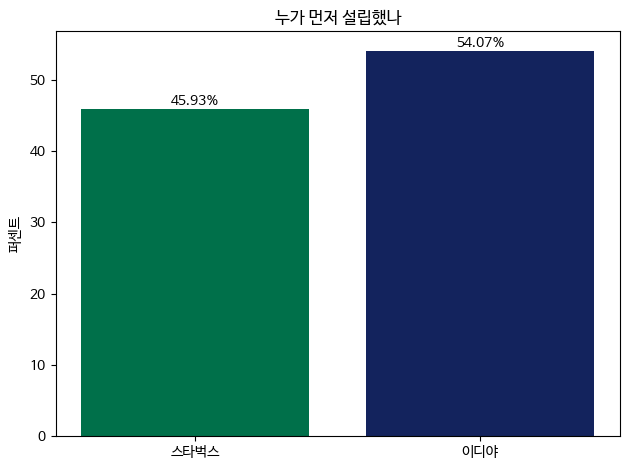

In [ ]:
# 빈도 계산
value_counts = se_near_500['인허가일자_누가먼저'].value_counts()

# 0과 1의 비율 계산
ratio_0 = np.around(value_counts[0] / len(se_near_500) * 100, 2)
ratio_1 = np.around(value_counts[1] / len(se_near_500) * 100, 2)

# 막대그래프 그리기
ax = plt.bar(['스타벅스', '이디야'], [ratio_0, ratio_1], color=['#00704A', '#13235D'])

# 그래프 제목과 축 레이블 설정
plt.title('누가 먼저 설립했나')
plt.ylabel('퍼센트')

# 각 막대의 가운데에 지점별 개수를 숫자로 표시
# 그래프 위에 비율 표시
plt.text(0, ratio_0, f'{ratio_0:.2f}%', ha='center', va='bottom', color='black', fontsize=10)
plt.text(1, ratio_1, f'{ratio_1:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [ ]:
# 300m 내 카페
se_near_300 = calculate_date_difference2(se_distances, 300)
se_near_300

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위,인허가일자_차이,인허가일자_누가먼저
43,스타벅스 서울교대점,37.487456,127.012365,서초구,2010-07-14,이디야 서울교대점,37.489767,127.011206,서초구,2014-11-26,276.610302,m,-1596,0
150,스타벅스 연합뉴스점,37.574393,126.977601,종로구,2019-02-14,이디야커피,37.572564,126.978933,종로구,2007-01-25,234.834300,m,4403,1
201,스타벅스 방배다이치빌딩점,37.484350,126.993203,서초구,2018-04-06,이디야 방배역점,37.482179,126.993996,서초구,2008-01-02,251.347579,m,3747,1
236,스타벅스 서초역이화빌딩점,37.488300,127.006130,서초구,2018-03-27,이디야 서초역점,37.487710,127.005630,서초구,2014-07-24,78.982577,m,1342,1
247,스타벅스 선릉동신빌딩R점,37.505493,127.047540,강남구,2018-03-21,이디야 선릉역점,37.503805,127.045177,강남구,2020-11-24,280.539167,m,-979,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15137,스타벅스마포아크로점,37.541336,126.946100,마포구,2007-09-14,이디야,37.539789,126.944464,마포구,2007-04-10,224.496288,m,157,1
15152,스타벅스학동역점,37.514654,127.027834,강남구,2004-08-23,이디야 논현학동점,37.514076,127.025200,강남구,2019-06-26,241.003305,m,-5420,0
15186,스타벅스학동역점,37.514654,127.027834,강남구,2004-08-23,이디야 학동역점,37.515048,127.030247,강남구,2020-08-24,217.335892,m,-5845,0
15215,스타벅스커피구의디티(DT)점,37.545279,127.084403,광진구,2015-04-27,이디야커피,37.544738,127.083041,광진구,2015-12-09,134.307901,m,-226,0


In [ ]:
se_near_300['인허가일자_누가먼저'].value_counts()

1    267
0    209
Name: 인허가일자_누가먼저, dtype: int64

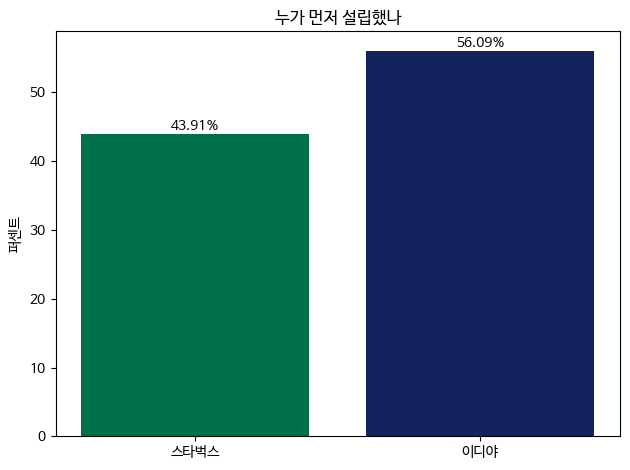

In [ ]:
# 빈도 계산
value_counts = se_near_300['인허가일자_누가먼저'].value_counts()

# 0과 1의 비율 계산
ratio_0 = np.around(value_counts[0] / len(se_near_300) * 100, 2)
ratio_1 = np.around(value_counts[1] / len(se_near_300) * 100, 2)

# 막대그래프 그리기
ax = plt.bar(['스타벅스', '이디야'], [ratio_0, ratio_1], color=['#00704A', '#13235D'])

# 그래프 제목과 축 레이블 설정
plt.title('누가 먼저 설립했나')
plt.ylabel('퍼센트')

# 각 막대의 가운데에 지점별 개수를 숫자로 표시
# 그래프 위에 비율 표시
plt.text(0, ratio_0, f'{ratio_0:.2f}%', ha='center', va='bottom', color='black', fontsize=10)
plt.text(1, ratio_1, f'{ratio_1:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [ ]:
# 100m 내 카페
se_near_100 = calculate_date_difference2(se_distances, 100)
se_near_100

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위,인허가일자_차이,인허가일자_누가먼저
236,스타벅스 서초역이화빌딩점,37.488300,127.006130,서초구,2018-03-27,이디야 서초역점,37.487710,127.005630,서초구,2014-07-24,78.982577,m,1342,1
287,스타벅스 센트럴F1점,37.504364,127.000731,서초구,2018-03-12,이디야커피 강남센트럴시티점,37.504364,127.000731,서초구,2020-01-07,0.000000,m,-666,0
318,스타벅스 서울고속터미널점,37.505519,127.004172,서초구,2017-03-28,이디야 서울고속버스터미널점,37.505519,127.004172,서초구,2019-10-04,0.000000,m,-920,0
453,스타벅스 동묘앞역점,37.572807,127.013185,종로구,2016-04-25,이디야 동묘역점,37.573105,127.013905,종로구,2013-02-13,71.565483,m,1167,1
468,스타벅스 종로구청점,37.572651,126.978202,종로구,2016-04-04,이디야커피,37.572564,126.978933,종로구,2007-01-25,65.161852,m,3357,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14744,스타벅스 문정하비오점,37.480605,127.120776,송파구,2017-05-25,이디야 커피 송파 하비오점,37.480605,127.120776,송파구,2017-03-29,0.000000,m,57,1
14865,스타벅스 가든파이브,37.478626,127.116385,송파구,2011-06-28,이디야 가든파이브점,37.478626,127.116385,송파구,2018-08-29,0.000000,m,-2619,0
14901,스타벅스고대점,37.583961,127.026839,성북구,2003-07-02,이디야고대점,37.584684,127.026666,성북구,2017-12-29,81.827790,m,-5294,0
15071,스타벅스 삼성현대힐점,37.513517,127.049831,강남구,2008-12-03,이디야커피 삼성중앙역점,37.513872,127.050367,강남구,2022-04-07,61.587993,m,-4873,0


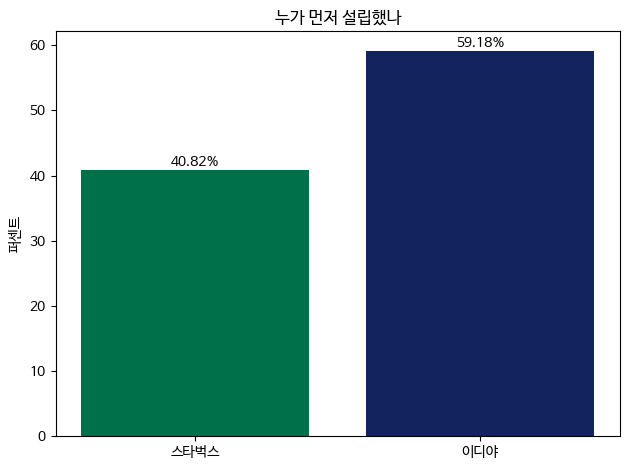

In [ ]:
# 빈도 계산
value_counts = se_near_100['인허가일자_누가먼저'].value_counts()

# 0과 1의 비율 계산
ratio_0 = np.around(value_counts[0] / len(se_near_100) * 100, 2)
ratio_1 = np.around(value_counts[1] / len(se_near_100) * 100, 2)

# 막대그래프 그리기
ax = plt.bar(['스타벅스', '이디야'], [ratio_0, ratio_1], color=['#00704A', '#13235D'])

# 그래프 제목과 축 레이블 설정
plt.title('누가 먼저 설립했나')
plt.ylabel('퍼센트')

# 각 막대의 가운데에 지점별 개수를 숫자로 표시
# 그래프 위에 비율 표시
plt.text(0, ratio_0, f'{ratio_0:.2f}%', ha='center', va='bottom', color='black', fontsize=10)
plt.text(1, ratio_1, f'{ratio_1:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [ ]:
ratio_test(se_near_500)

p0: 통계량=0.9422098398208618, p-value=0.16647104918956757
p1: 통계량=0.9422097206115723, p-value=0.16646970808506012
등분산 검정 통계량: 0.0
p-value: 1.0
Z-통계량: -5.5145007752734445
p-value: 0.9999999825114317


In [ ]:
ratio_test(se_near_300)

p0: 통계량=0.946196436882019, p-value=0.20551393926143646
p1: 통계량=0.946196436882019, p-value=0.20551393926143646
등분산 검정 통계량: 0.0
p-value: 1.0
Z-통계량: -5.939329001470088
p-value: 0.999999998569045


In [ ]:
ratio_test(se_near_100)

p0: 통계량=0.8765408992767334, p-value=0.008569086901843548
p1: 통계량=0.876541018486023, p-value=0.00856913160532713
등분산 검정 통계량: 0.0
p-value: 1.0
Z-통계량: -2.6224553076425523
p-value: 0.9956350641599176


### 이디야 & 메가커피

In [ ]:
# 거리계산
em_distances = calculate_distances_within_gu(ediya_new, mega_new)

In [ ]:
# 500m 내 카페
em_near_500 = calculate_date_difference2(em_distances, 500)
em_near_500

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위,인허가일자_차이,인허가일자_누가먼저
21,이디야 돌곶이역점,37.610208,127.055213,성북구,2023-03-24,메가엠지씨커피 돌곶이역점,37.609629,127.055629,성북구,2022-11-22,73.996916,m,122,1
29,이디야 가락몰점,37.493483,127.108614,송파구,2016-02-24,엠엘(주) 메가엠지씨커피 가락몰점,37.493483,127.108614,송파구,2022-05-09,0.000000,m,-2266,0
61,이디야 고척스카이돔점,37.497728,126.860933,구로구,2018-01-15,메가엠지씨커피 고척중앙점,37.498071,126.861328,구로구,2023-03-31,51.702362,m,-1901,0
68,이디야 고척스카이돔점,37.497728,126.860933,구로구,2018-01-15,메가엠지씨커피 개봉북부역,37.495483,126.856877,구로구,2019-05-16,436.285360,m,-486,0
91,이디야커피,37.573594,126.985140,종로구,2013-12-20,메가엠지씨커피 종로3가역점,37.571000,126.988999,종로구,2021-07-30,445.926132,m,-2779,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12243,이디야 안암래미안점,37.589000,127.019130,성북구,2022-05-10,메가엠지씨커피 성북구청점,37.588735,127.013674,성북구,2021-03-04,481.630872,m,432,1
12248,이디야 안암래미안점,37.589000,127.019130,성북구,2022-05-10,메가엠지씨커피 보문역점,37.586113,127.016309,성북구,2022-05-10,406.008179,m,0,1
12254,이디야커피 을지로중앙점,37.564512,126.990829,중구,2012-05-07,메가엠지씨커피 충무로저동점,37.562900,126.987636,중구,2023-06-15,333.664280,m,-4056,0
12258,이디야커피 을지로중앙점,37.564512,126.990829,중구,2012-05-07,메가엠지씨커피 충무로역점,37.561354,126.990690,중구,2022-06-24,351.423037,m,-3700,0


In [ ]:
em_near_500['인허가일자_누가먼저'].value_counts()

0    628
1     77
Name: 인허가일자_누가먼저, dtype: int64

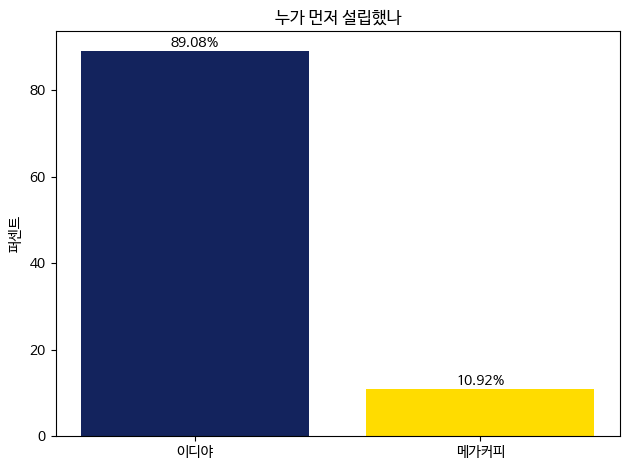

In [ ]:
# 빈도 계산
value_counts = em_near_500['인허가일자_누가먼저'].value_counts()

# 0과 1의 비율 계산
ratio_0 = np.around(value_counts[0] / len(em_near_500) * 100, 2)
ratio_1 = np.around(value_counts[1] / len(em_near_500) * 100, 2)

# 막대그래프 그리기
ax = plt.bar(['이디야', '메가커피'], [ratio_0, ratio_1], color=['#13235D',  '#FFDC00'])

# 그래프 제목과 축 레이블 설정
plt.title('누가 먼저 설립했나')
plt.ylabel('퍼센트')

# 각 막대의 가운데에 지점별 개수를 숫자로 표시
# 그래프 위에 비율 표시
plt.text(0, ratio_0, f'{ratio_0:.2f}%', ha='center', va='bottom', color='black', fontsize=10)
plt.text(1, ratio_1, f'{ratio_1:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [ ]:
# 300m 내 카페
em_near_300 = calculate_date_difference2(em_distances, 300)
em_near_300

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위,인허가일자_차이,인허가일자_누가먼저
21,이디야 돌곶이역점,37.610208,127.055213,성북구,2023-03-24,메가엠지씨커피 돌곶이역점,37.609629,127.055629,성북구,2022-11-22,73.996916,m,122,1
29,이디야 가락몰점,37.493483,127.108614,송파구,2016-02-24,엠엘(주) 메가엠지씨커피 가락몰점,37.493483,127.108614,송파구,2022-05-09,0.000000,m,-2266,0
61,이디야 고척스카이돔점,37.497728,126.860933,구로구,2018-01-15,메가엠지씨커피 고척중앙점,37.498071,126.861328,구로구,2023-03-31,51.702362,m,-1901,0
133,이디야커피 길동사거리점,37.534044,127.134062,강동구,2018-07-20,메가엠지씨커피 강동역점,37.535549,127.132032,강동구,2022-04-11,245.030969,m,-1361,0
146,이디야 경희궁점,37.571667,126.967812,종로구,2023-04-27,메가엠지씨커피 LG광화문빌딩점,37.569347,126.968618,종로구,2024-01-17,267.594904,m,-265,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12031,이디야 송파문정점,37.492957,127.122462,송파구,2019-04-01,메가커피 문정로데오,37.491879,127.122623,송파구,2021-09-06,120.725958,m,-889,0
12076,이디야 문정문현점,37.480148,127.123762,송파구,2019-04-11,메가엠지씨커피 문정아이파크점,37.482026,127.122139,송파구,2018-05-02,253.213327,m,344,1
12135,이디야 송파 풍납점,37.528101,127.113654,송파구,2019-02-14,메가엠지씨커피 서울 풍납점,37.529195,127.113902,송파구,2020-11-30,123.570014,m,-655,0
12209,이디야노원중앙점,37.656865,127.064217,노원구,2017-04-04,메가엠지씨커피 노원중앙점,37.655414,127.061675,노원구,2019-05-27,275.898583,m,-783,0


In [ ]:
em_near_300['인허가일자_누가먼저'].value_counts()

0    310
1     35
Name: 인허가일자_누가먼저, dtype: int64

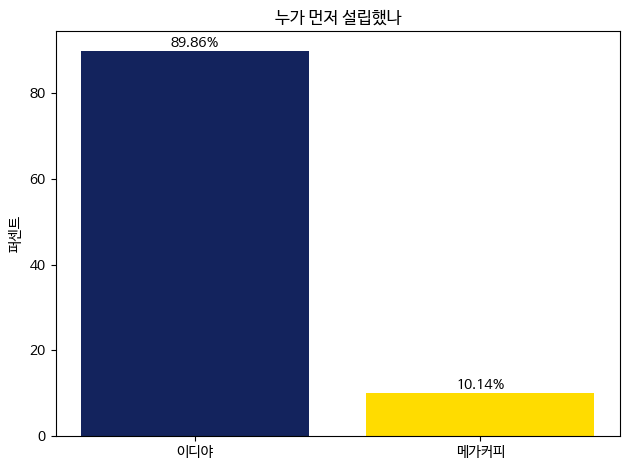

In [ ]:
# 빈도 계산
value_counts = em_near_300['인허가일자_누가먼저'].value_counts()

# 0과 1의 비율 계산
ratio_0 = np.around(value_counts[0] / len(em_near_300) * 100, 2)
ratio_1 = np.around(value_counts[1] / len(em_near_300) * 100, 2)

# 막대그래프 그리기
ax = plt.bar(['이디야', '메가커피'], [ratio_0, ratio_1], color=['#13235D',  '#FFDC00'])

# 그래프 제목과 축 레이블 설정
plt.title('누가 먼저 설립했나')
plt.ylabel('퍼센트')

# 각 막대의 가운데에 지점별 개수를 숫자로 표시
# 그래프 위에 비율 표시
plt.text(0, ratio_0, f'{ratio_0:.2f}%', ha='center', va='bottom', color='black', fontsize=10)
plt.text(1, ratio_1, f'{ratio_1:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [ ]:
# 100m 내 카페
em_near_100 = calculate_date_difference2(em_distances, 100)
em_near_100

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위,인허가일자_차이,인허가일자_누가먼저
21,이디야 돌곶이역점,37.610208,127.055213,성북구,2023-03-24,메가엠지씨커피 돌곶이역점,37.609629,127.055629,성북구,2022-11-22,73.996916,m,122,1
29,이디야 가락몰점,37.493483,127.108614,송파구,2016-02-24,엠엘(주) 메가엠지씨커피 가락몰점,37.493483,127.108614,송파구,2022-05-09,0.000000,m,-2266,0
61,이디야 고척스카이돔점,37.497728,126.860933,구로구,2018-01-15,메가엠지씨커피 고척중앙점,37.498071,126.861328,구로구,2023-03-31,51.702362,m,-1901,0
322,이디야,37.521870,126.901350,영등포구,2023-04-17,메가엠지씨커피영등포위더스점,37.521326,126.901774,영등포구,2016-04-06,71.142058,m,2567,1
397,이디야커피 당고개역점,37.670841,127.077487,노원구,2013-12-30,메가엠지씨커피 당고개역점,37.670607,127.076442,노원구,2023-11-17,95.641767,m,-3609,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11407,이디야커피오금점,37.502877,127.123230,송파구,2008-12-30,메가엠지씨커피 오금역점,37.502877,127.123230,송파구,2022-05-24,0.000000,m,-4893,0
11450,이디야 거여역점,37.493502,127.141300,송파구,2009-01-13,메가엠지씨커피 거여역점,37.492837,127.141766,송파구,2021-01-15,84.595016,m,-4385,0
11481,이디야 송파파인타운점,37.477243,127.124514,송파구,2018-05-11,메가엠지씨커피 송파파인타운,37.477243,127.124514,송파구,2021-05-17,0.000000,m,-1102,0
11543,이디야커피 송파위례점,37.481150,127.139337,송파구,2018-05-31,메가엠지씨커피 위례광장점,37.481742,127.139328,송파구,2023-03-23,65.924055,m,-1757,0


In [ ]:
em_near_100['인허가일자_누가먼저'].value_counts()

0    111
1     15
Name: 인허가일자_누가먼저, dtype: int64

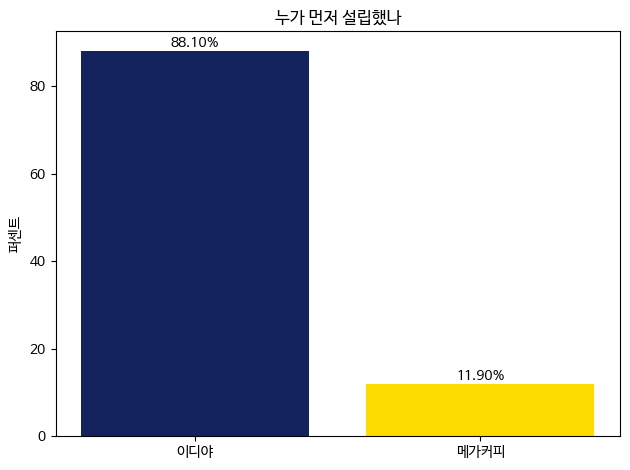

In [ ]:
# 빈도 계산
value_counts = em_near_100['인허가일자_누가먼저'].value_counts()

# 0과 1의 비율 계산
ratio_0 = np.around(value_counts[0] / len(em_near_100) * 100, 2)
ratio_1 = np.around(value_counts[1] / len(em_near_100) * 100, 2)

# 막대그래프 그리기
ax = plt.bar(['이디야', '메가커피'], [ratio_0, ratio_1], color=['#13235D',  '#FFDC00'])

# 그래프 제목과 축 레이블 설정
plt.title('누가 먼저 설립했나')
plt.ylabel('퍼센트')

# 각 막대의 가운데에 지점별 개수를 숫자로 표시
# 그래프 위에 비율 표시
plt.text(0, ratio_0, f'{ratio_0:.2f}%', ha='center', va='bottom', color='black', fontsize=10)
plt.text(1, ratio_1, f'{ratio_1:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [ ]:
ratio_test(em_near_500)

p0: 통계량=0.9228811264038086, p-value=0.05961313843727112
p1: 통계량=0.9228814244270325, p-value=0.05961412563920021
등분산 검정 통계량: 0.0
p-value: 1.0
Z-통계량: 37.36583731887152
p-value: 0.0


In [ ]:
ratio_test(em_near_300)

p0: 통계량=0.878515899181366, p-value=0.0064411708153784275
p1: 통계량=0.8785160779953003, p-value=0.006441222503781319
등분산 검정 통계량: 4.4854296269787344e-30
p-value: 1.0
Z-통계량: 34.316449368432494
p-value: 0.0


In [ ]:
ratio_test(em_near_100)

p0: 통계량=0.7777113914489746, p-value=0.0001301050215261057
p1: 통계량=0.7777112722396851, p-value=0.00013010454131290317
등분산 검정 통계량: 1.4351062476238512e-30
p-value: 1.0
Z-통계량: 18.885347747329735
p-value: 0.0


### 메가커피 & 컴포즈커피

In [ ]:
# 거리계산
mc_distances = calculate_distances_within_gu(mega_new, compose_new)

In [ ]:
# 500m 내 카페
mc_near_500 = calculate_date_difference2(mc_distances, 500)
mc_near_500

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위,인허가일자_차이,인허가일자_누가먼저
11,메가엠지씨커피 압구정로데오역점,37.527921,127.036011,강남구,2023-03-24,컴포즈커피 압구정스마일점,37.528149,127.035159,강남구,2024-01-31,79.324840,m,-313,0
20,메가엠지씨커피 압구정로데오역점,37.527921,127.036011,강남구,2023-03-24,컴포즈,37.524898,127.036404,강남구,2020-11-09,337.983698,m,865,1
42,메가엠지씨커피 금천롯데캐슬,37.459752,126.891570,금천구,2019-03-18,컴포즈커피금천롯데캐슬점,37.459752,126.891570,금천구,2021-01-27,0.000000,m,-681,0
52,메가엠지씨커피 중곡대원점,37.563878,127.084222,광진구,2023-03-27,컴포즈커피 광진긴고랑로점,37.560871,127.081615,광진구,2021-05-24,405.745420,m,672,1
62,메가엠지씨커피 청구신당점,37.561859,127.013993,중구,2023-03-27,컴포즈커피,37.565325,127.015091,중구,2020-10-30,397.387529,m,878,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,메가엠지씨커피 공릉신도브래뉴점,37.625350,127.068733,노원구,2023-01-09,컴포즈커피 노원공릉점,37.628415,127.067332,노원구,2021-02-17,362.458513,m,691,1
8126,메가엠지씨커피 은평갈현시장점,37.623464,126.916688,은평구,2023-01-09,컴포즈커피 연신내로데오점,37.620450,126.916293,은평구,2023-06-13,336.935715,m,-155,0
8142,메가엠지씨커피 은평갈현시장점,37.623464,126.916688,은평구,2023-01-09,컴포즈커피 은평갈현시장점,37.623538,126.916372,은평구,2021-06-22,28.977098,m,566,1
8155,메가엠지씨커피 까치산역점,37.530731,126.844148,강서구,2018-10-15,컴포즈커피 화곡8동점,37.530939,126.847668,강서구,2022-10-27,311.250465,m,-1473,0


In [ ]:
mc_near_500['인허가일자_누가먼저'].value_counts()

0    266
1    221
Name: 인허가일자_누가먼저, dtype: int64

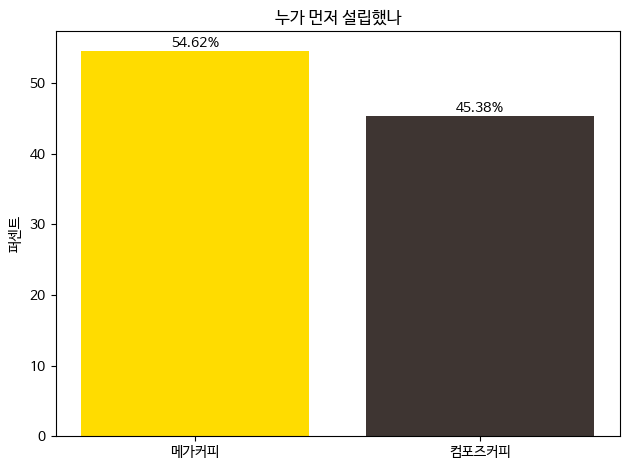

In [ ]:
# 빈도 계산
value_counts = mc_near_500['인허가일자_누가먼저'].value_counts()

# 0과 1의 비율 계산
ratio_0 = np.around(value_counts[0] / len(mc_near_500) * 100, 2)
ratio_1 = np.around(value_counts[1] / len(mc_near_500) * 100, 2)

# 막대그래프 그리기
ax = plt.bar(['메가커피', '컴포즈커피'], [ratio_0, ratio_1], color=['#FFDC00', '#3E3532'])

# 그래프 제목과 축 레이블 설정
plt.title('누가 먼저 설립했나')
plt.ylabel('퍼센트')

# 각 막대의 가운데에 지점별 개수를 숫자로 표시
# 그래프 위에 비율 표시
plt.text(0, ratio_0, f'{ratio_0:.2f}%', ha='center', va='bottom', color='black', fontsize=10)
plt.text(1, ratio_1, f'{ratio_1:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [ ]:
# 300m 내 카페
mc_near_300 = calculate_date_difference2(mc_distances, 300)
mc_near_300

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위,인허가일자_차이,인허가일자_누가먼저
11,메가엠지씨커피 압구정로데오역점,37.527921,127.036011,강남구,2023-03-24,컴포즈커피 압구정스마일점,37.528149,127.035159,강남구,2024-01-31,79.324840,m,-313,0
42,메가엠지씨커피 금천롯데캐슬,37.459752,126.891570,금천구,2019-03-18,컴포즈커피금천롯데캐슬점,37.459752,126.891570,금천구,2021-01-27,0.000000,m,-681,0
65,메가엠지씨커피 청구신당점,37.561859,127.013993,중구,2023-03-27,컴포즈커피 신당점,37.563145,127.012314,중구,2020-04-23,205.835326,m,1068,1
142,메가엠지씨커피 온수역점,37.492246,126.818334,구로구,2021-12-14,컴포즈커피 온수북부점,37.492269,126.817671,구로구,2022-08-23,58.475866,m,-252,0
170,메가엠지씨커피 신정네거리역점,37.519919,126.849729,양천구,2019-08-30,컴포즈커피 신정네거리점,37.518008,126.849078,양천구,2021-06-03,220.119941,m,-643,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949,메가엠지씨커피 신월양강점,37.523134,126.843192,양천구,2022-11-15,컴포즈 신월양강점,37.522965,126.842540,양천구,2021-09-24,60.500631,m,417,1
8100,메가엠지씨커피 미아중앙점,37.624414,127.024378,강북구,2022-12-30,컴포즈커피 미아점,37.624303,127.023702,강북구,2021-07-02,60.814352,m,546,1
8109,메가엠지씨커피 도선사거리점,37.565821,127.033153,성동구,2022-05-13,컴포즈커피(성동구청점),37.564393,127.032046,성동구,2023-01-06,186.328447,m,-238,0
8142,메가엠지씨커피 은평갈현시장점,37.623464,126.916688,은평구,2023-01-09,컴포즈커피 은평갈현시장점,37.623538,126.916372,은평구,2021-06-22,28.977098,m,566,1


In [ ]:
mc_near_300['인허가일자_누가먼저'].value_counts()

0    145
1    115
Name: 인허가일자_누가먼저, dtype: int64

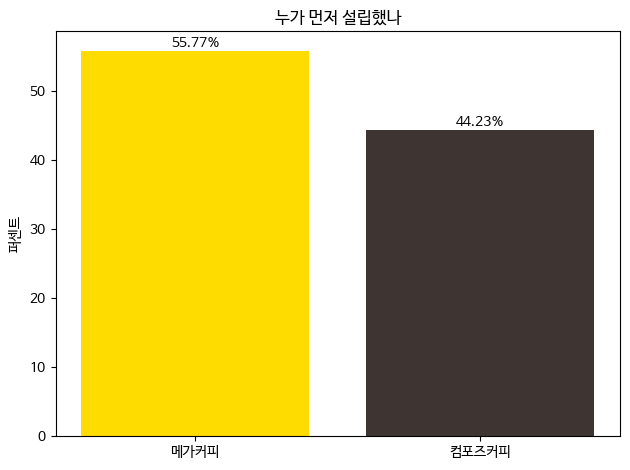

In [ ]:
# 빈도 계산
value_counts = mc_near_300['인허가일자_누가먼저'].value_counts()

# 0과 1의 비율 계산
ratio_0 = np.around(value_counts[0] / len(mc_near_300) * 100, 2)
ratio_1 = np.around(value_counts[1] / len(mc_near_300) * 100, 2)

# 막대그래프 그리기
ax = plt.bar(['메가커피', '컴포즈커피'], [ratio_0, ratio_1], color=['#FFDC00', '#3E3532'])

# 그래프 제목과 축 레이블 설정
plt.title('누가 먼저 설립했나')
plt.ylabel('퍼센트')

# 각 막대의 가운데에 지점별 개수를 숫자로 표시
# 그래프 위에 비율 표시
plt.text(0, ratio_0, f'{ratio_0:.2f}%', ha='center', va='bottom', color='black', fontsize=10)
plt.text(1, ratio_1, f'{ratio_1:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [ ]:
# 100m 내 카페
mc_near_100 = calculate_date_difference2(mc_distances, 100)
mc_near_100

,매장명1,위도1,경도1,구1,인허가일자1,매장명2,위도2,경도2,구2,인허가일자2,거리,단위,인허가일자_차이,인허가일자_누가먼저
11,메가엠지씨커피 압구정로데오역점,37.527921,127.036011,강남구,2023-03-24,컴포즈커피 압구정스마일점,37.528149,127.035159,강남구,2024-01-31,79.324840,m,-313,0
42,메가엠지씨커피 금천롯데캐슬,37.459752,126.891570,금천구,2019-03-18,컴포즈커피금천롯데캐슬점,37.459752,126.891570,금천구,2021-01-27,0.000000,m,-681,0
142,메가엠지씨커피 온수역점,37.492246,126.818334,구로구,2021-12-14,컴포즈커피 온수북부점,37.492269,126.817671,구로구,2022-08-23,58.475866,m,-252,0
376,메가엠지씨커피 서초샤르망점,37.486122,127.011624,서초구,2023-04-03,컴포즈커피 남부터미널점,37.486122,127.011624,서초구,2021-11-16,0.000000,m,503,1
564,메가엠지씨커피 위례광장점,37.481742,127.139328,송파구,2023-03-23,컴포즈커피 위례호수공원점,37.481356,127.140050,송파구,2021-04-27,76.858605,m,695,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7854,메가엠지씨커피발산중앙점,37.552527,126.834354,강서구,2019-08-22,컴포즈커피 내발산점,37.552717,126.834107,강서구,2020-10-21,30.358528,m,-426,0
7868,메가엠지씨커피 돌곶이역점,37.609629,127.055629,성북구,2022-11-22,컴포즈 석관시장점,37.609095,127.056416,성북구,2021-09-03,91.309798,m,445,1
7949,메가엠지씨커피 신월양강점,37.523134,126.843192,양천구,2022-11-15,컴포즈 신월양강점,37.522965,126.842540,양천구,2021-09-24,60.500631,m,417,1
8100,메가엠지씨커피 미아중앙점,37.624414,127.024378,강북구,2022-12-30,컴포즈커피 미아점,37.624303,127.023702,강북구,2021-07-02,60.814352,m,546,1


In [ ]:
mc_near_100['인허가일자_누가먼저'].value_counts()

0    54
1    37
Name: 인허가일자_누가먼저, dtype: int64

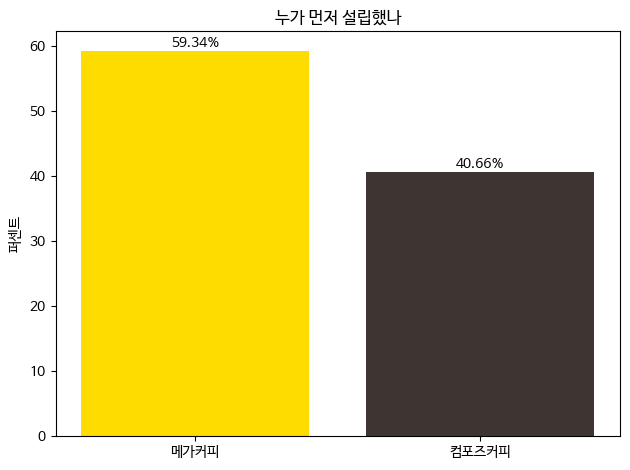

In [ ]:
# 빈도 계산
value_counts = mc_near_100['인허가일자_누가먼저'].value_counts()

# 0과 1의 비율 계산
ratio_0 = np.around(value_counts[0] / len(mc_near_100) * 100, 2)
ratio_1 = np.around(value_counts[1] / len(mc_near_100) * 100, 2)

# 막대그래프 그리기
ax = plt.bar(['메가커피', '컴포즈커피'], [ratio_0, ratio_1], color=['#FFDC00', '#3E3532'])

# 그래프 제목과 축 레이블 설정
plt.title('누가 먼저 설립했나')
plt.ylabel('퍼센트')

# 각 막대의 가운데에 지점별 개수를 숫자로 표시
# 그래프 위에 비율 표시
plt.text(0, ratio_0, f'{ratio_0:.2f}%', ha='center', va='bottom', color='black', fontsize=10)
plt.text(1, ratio_1, f'{ratio_1:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [ ]:
ratio_test(mc_near_500)

p0: 통계량=0.9476194381713867, p-value=0.22145429253578186
p1: 통계량=0.947619616985321, p-value=0.2214566171169281
등분산 검정 통계량: 0.0
p-value: 1.0
Z-통계량: 1.6594947543127787
p-value: 0.04850806841127375


In [ ]:
ratio_test(mc_near_300)

p0: 통계량=0.9468201398849487, p-value=0.21236282587051392
p1: 통계량=0.9468201398849487, p-value=0.21236282587051392
등분산 검정 통계량: 0.0
p-value: 1.0
Z-통계량: 1.784812428520675
p-value: 0.03714587335827413


In [ ]:
ratio_test(mc_near_100)

p0: 통계량=0.8886524438858032, p-value=0.0177419763058424
p1: 통계량=0.8886522650718689, p-value=0.0177418515086174
등분산 검정 통계량: 0.0
p-value: 1.0
Z-통계량: 1.329941661953486
p-value: 0.09176874661630419
